### Illustration

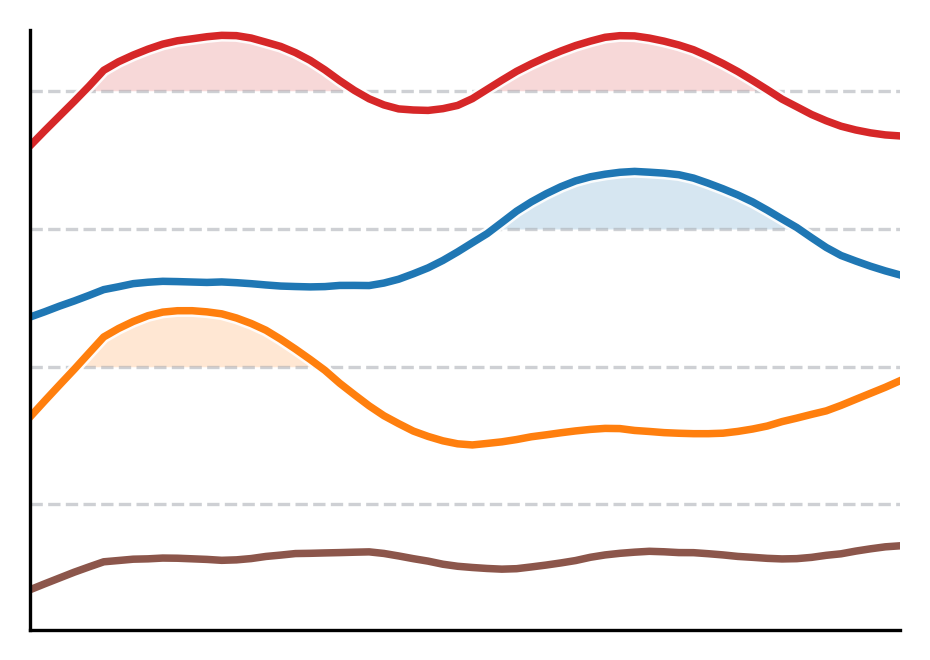

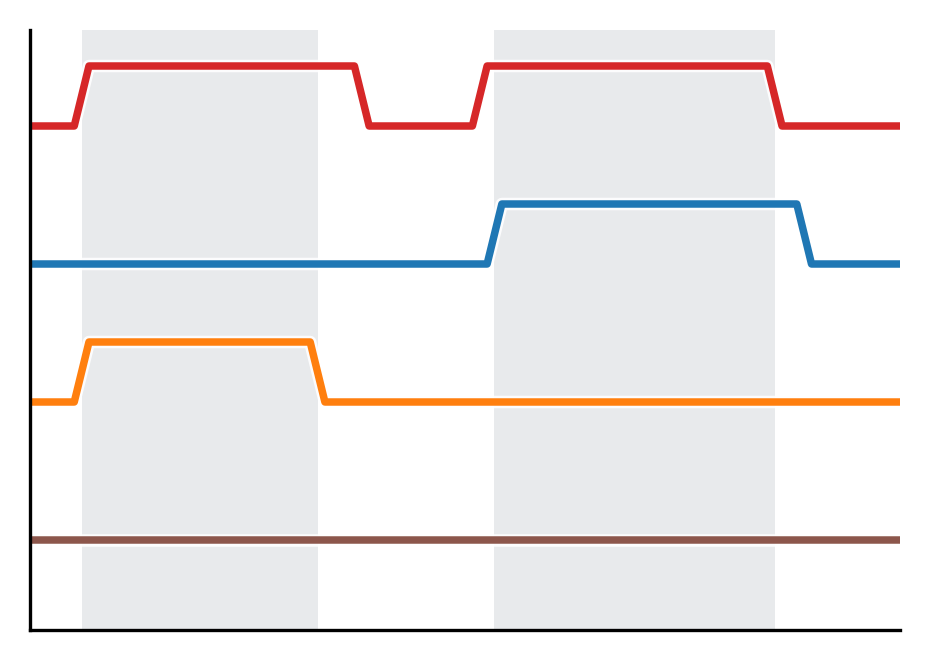

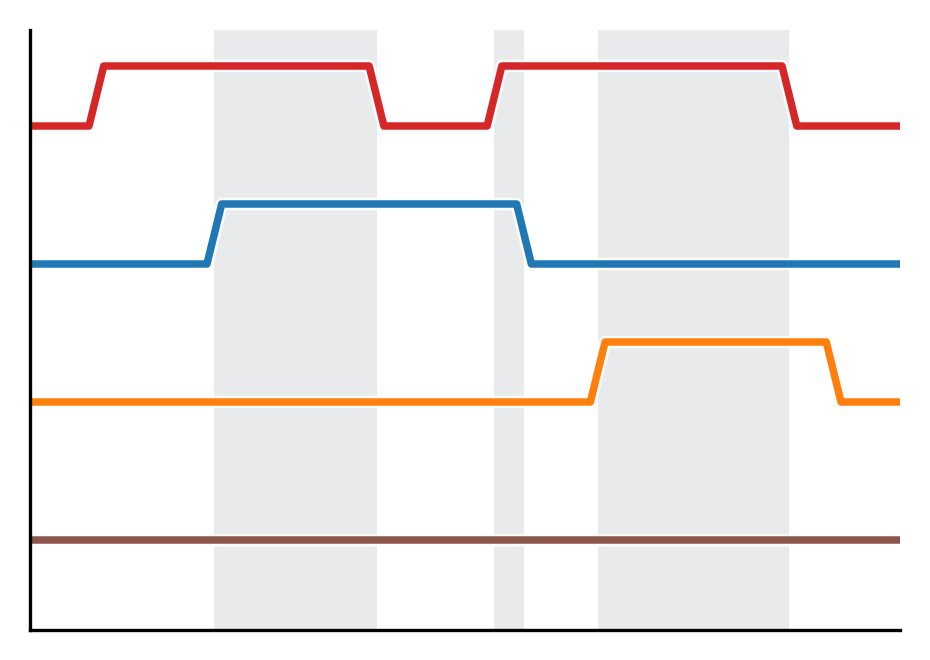

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

np.random.seed(0)
n_time = 130
n_emotions = 6
threshold = 0.5
EMO_COLORS = ['#d62728', '#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b']

real_data = np.zeros((n_time, 6))
real_data[np.concatenate((np.arange(20), np.arange(30,50), np.arange(80,83))).astype(int),0] = 1
real_data[np.arange(31,52).astype(int),1] = 1
real_data[np.concatenate((np.arange(20), np.arange(62,83), np.arange(100,104))).astype(int),2] = 1
real_data[np.concatenate((np.arange(45,48), np.arange(95,120))).astype(int),3] = 1
real_data[np.arange(64,84).astype(int),4] = 1
real_data[np.arange(96,120).astype(int),5] = 1

rng = np.random.default_rng(42)
raw_curves = np.zeros_like(real_data, dtype=float)
low_lo, low_hi = 0.0, 3.5
hi_lo,  hi_hi  = 3.5, 7.0

for d in range(n_emotions):
    vals = np.empty(n_time, dtype=float)
    mask_hi = real_data[:, d] > 0.5
    vals[~mask_hi] = rng.uniform(low_lo, low_hi, size=(~mask_hi).sum())
    vals[mask_hi]  = rng.uniform(hi_lo,  hi_hi,  size=mask_hi.sum())
    raw_curves[:, d] = vals

def moving_avg(x, w):
    if w <= 1: return x
    c = np.convolve(x, np.ones(w)/w, mode='same')
    return np.convolve(c, np.ones(w)/w, mode='same')

n_time = 60
threshold = 3.5
window = 10
smoothed_curves = np.vstack([moving_avg(raw_curves[:, d], window) for d in range(n_emotions)]).T
smoothed_curves = smoothed_curves[:60, :]

rng = np.random.default_rng(123)
shifted_data = np.zeros_like(smoothed_curves)
for i in range(6):
    s = int(rng.integers(1, n_time))  
    shifted_data[:, i] = np.roll(smoothed_curves[:, i], s, axis=0)

real_bin = (smoothed_curves > threshold).astype(int)
shuf_bin = (shifted_data > threshold).astype(int)

real_multi = (real_bin.sum(axis=1) >= 2).astype(int)
shuf_multi = (shuf_bin.sum(axis=1) >= 2).astype(int)

prop_real = real_multi.mean()
prop_shuf = shuf_multi.mean()

def nice_line(ax, x, y, color, lw=1.8):
    ax.plot(x, y, color=color, lw=lw,
            path_effects=[pe.Stroke(linewidth=lw+1.2, foreground="white", alpha=0.9),
                          pe.Normal()])

PLOT_IDXS = [0, 1, 2, 5]  
t = np.arange(n_time)

fig = plt.figure(figsize=(3.2, 2.3), dpi=300)
ax0 = fig.add_subplot(111)
offset = 4.5

for j, d in enumerate(PLOT_IDXS):
    thr_val = threshold + offset*(len(PLOT_IDXS)-1-j)
    thr_arr = np.full_like(t, thr_val, dtype=float)
    y = smoothed_curves[:, d] + offset*(len(PLOT_IDXS)-1-j)
    ax0.fill_between(
        t, thr_arr, y,
        where=(y >= thr_arr),
        color=EMO_COLORS[d], alpha=0.18, linewidth=0,
        interpolate=True, zorder=0
    )

    ax0.plot(t, thr_arr, ls="--", lw=0.8, color="#A7AAB1", alpha=0.55, zorder=1.5)

    ax0.plot(
        t, y, color=EMO_COLORS[d], lw=1.8, zorder=2,
        path_effects=[pe.Stroke(linewidth=3.0, foreground="white", alpha=0.9), pe.Normal()]
    )


ax0.set_xlim(0, n_time-1)
ax0.set_ylim(-0.6, threshold + offset*(len(PLOT_IDXS)-1) + 2.0)
ax0.set_xticks([]); ax0.set_yticks([])
for s in ["top","right"]: ax0.spines[s].set_visible(False)
ax0.yaxis.grid(True, linestyle='-', alpha=0.10)
plt.tight_layout()
plt.savefig('figures/coocurrence_illus1.svg', dpi=300, bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(3.2, 2.3), dpi=300)
ax1 = fig.add_subplot(111)
offset_b = 2.3
for j, d in enumerate(PLOT_IDXS):
    y = real_bin[:, d] + offset_b*(len(PLOT_IDXS)-1-j) + 1
    nice_line(ax1, t, y, EMO_COLORS[d], lw=1.8)

for ti in np.where(real_multi==1)[0]:
    ax1.axvspan(ti-0.5, ti+0.5, color="#9AA1AA", alpha=0.22, lw=0)

ax1.set_xlim(0, n_time-1)
ax1.set_ylim(-0.5, offset_b*(len(PLOT_IDXS)-1)+1.6+1)
ax1.set_xticks([]); ax1.set_yticks([])
for s in ["top","right"]: ax1.spines[s].set_visible(False)
ax1.yaxis.grid(True, linestyle='-', alpha=0.10)
plt.tight_layout()
plt.savefig('figures/coocurrence_illus2.svg', dpi=300, bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(3.2, 2.3), dpi=300)
ax2 = fig.add_subplot(111)
offset_c = 2.3
for j, d in enumerate(PLOT_IDXS):
    y = shuf_bin[:, d] + offset_c*(len(PLOT_IDXS)-1-j) + 1
    nice_line(ax2, t, y, EMO_COLORS[d], lw=1.8)
for ti in np.where(shuf_multi==1)[0]:
    ax2.axvspan(ti-0.5, ti+0.5, color="#9AA1AA", alpha=0.22, lw=0)

ax2.set_xlim(0, n_time-1)
ax2.set_ylim(-0.5, offset_c*(len(PLOT_IDXS)-1)+1.6+1)
ax2.set_xticks([]); ax2.set_yticks([])
for s in ["top","right"]: ax2.spines[s].set_visible(False)
ax2.yaxis.grid(True, linestyle='-', alpha=0.10)
plt.tight_layout()
plt.savefig('figures/coocurrence_illus3.svg', dpi=300, bbox_inches='tight')
plt.show()


### Load data

In [4]:
import pickle

with open(r'\\10.16.57.94\dataset1\xinke\Danmu\DyEmo-submit\DyEmo-FullMovies\Emotion_scores\scores_allMovies_resample.pkl', 'rb') as f:
    scores_dict = pickle.load(f)
# del scores_dict['BV1zW411d7Rb']
with open(r'\\10.16.57.94\dataset1\xinke\Danmu\DyEmo-submit\DyEmo-FullMovies\Emotion_scores\times_allMovies_resample.pkl', 'rb') as f:
    time_dict= pickle.load(f)
# del time_dict['BV1zW411d7Rb']

print(len(scores_dict.keys()))
print(len(time_dict.keys()))

scores_all = np.zeros((0,6))
n_samples = []

scores_key = list(scores_dict.keys())
count = 0
for key in scores_key:
    print(scores_dict[key].shape)
    scores_all = np.concatenate((scores_all, scores_dict[key]), 0)
    n_samples.append(scores_dict[key].shape[0])
    count += 1
print(scores_all.shape)
n_samples_cum = np.concatenate((np.array([0]), np.cumsum(n_samples)))
print(n_samples_cum[-5:])

102
102
(4565, 6)
(3699, 6)
(4218, 6)
(1158, 6)
(3955, 6)
(3907, 6)
(4714, 6)
(3192, 6)
(2984, 6)
(3800, 6)
(3051, 6)
(3007, 6)
(4277, 6)
(5197, 6)
(3371, 6)
(3058, 6)
(3692, 6)
(3824, 6)
(3642, 6)
(3513, 6)
(6846, 6)
(2616, 6)
(2717, 6)
(3223, 6)
(3500, 6)
(4148, 6)
(3174, 6)
(3960, 6)
(3516, 6)
(3088, 6)
(4303, 6)
(2692, 6)
(4010, 6)
(2179, 6)
(2700, 6)
(4200, 6)
(3530, 6)
(3611, 6)
(3210, 6)
(4031, 6)
(3293, 6)
(4606, 6)
(5233, 6)
(3487, 6)
(4200, 6)
(3405, 6)
(4484, 6)
(3562, 6)
(3987, 6)
(4766, 6)
(3337, 6)
(2703, 6)
(2995, 6)
(2522, 6)
(4044, 6)
(3547, 6)
(3019, 6)
(2789, 6)
(1396, 6)
(3753, 6)
(3557, 6)
(4445, 6)
(5073, 6)
(3361, 6)
(3299, 6)
(3914, 6)
(2651, 6)
(2634, 6)
(3734, 6)
(3296, 6)
(5312, 6)
(4252, 6)
(2729, 6)
(2721, 6)
(3117, 6)
(2910, 6)
(4223, 6)
(2703, 6)
(3214, 6)
(3854, 6)
(3990, 6)
(3631, 6)
(3372, 6)
(2874, 6)
(3032, 6)
(2207, 6)
(3129, 6)
(2081, 6)
(2788, 6)
(2601, 6)
(4910, 6)
(3071, 6)
(1895, 6)
(4002, 6)
(4031, 6)
(3191, 6)
(2957, 6)
(3355, 6)
(2830, 6)
(3

In [5]:
def circular_shift_surrogate(curves, rng=None, min_shift=1):
    if rng is None:
        rng = np.random.default_rng()
    T, D = curves.shape
    out = np.empty_like(curves)
    for i in range(D):
        s = int(rng.integers(min_shift, T))
        out[:, i] = np.roll(curves[:, i], s, axis=0)
    return out

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

X_data = scores_all
tmp = np.arange(2.5,5.5,0.25)
print(len(tmp))
prop_thr = np.zeros((len(tmp), 3))
count = 0
for thr in tmp:
    data_thr = (X_data > thr).astype(int)
    
    prop_thr[count,0] = np.sum(np.sum(data_thr, axis=1) == 0) / data_thr.shape[0]
    prop_thr[count,1] = np.sum(np.sum(data_thr, axis=1) == 1) / data_thr.shape[0]
    prop_thr[count,2] = np.sum(np.sum(data_thr, axis=1) > 1) / data_thr.shape[0]
    count += 1
    
# random shuffle
np.random.seed(0)
prop_thr_shuffle = np.zeros((1000, len(tmp), 3))
for i in range(1000):
    # X_data_shuffle = np.zeros_like(X_data)
    # for j in range(6):
    #     X_data_shuffle[:,j] = X_data[np.random.permutation(X_data.shape[0]),j]
    rng = np.random.default_rng(i)
    X_data_shuffle = circular_shift_surrogate(X_data, rng=rng, min_shift=1)
    count = 0
    for thr in tmp:
        data_thr = (X_data_shuffle > thr).astype(int)
        
        prop_thr_shuffle[i,count,0] = np.sum(np.sum(data_thr, axis=1) == 0) / data_thr.shape[0]
        prop_thr_shuffle[i,count,1] = np.sum(np.sum(data_thr, axis=1) == 1) / data_thr.shape[0]
        prop_thr_shuffle[i,count,2] = np.sum(np.sum(data_thr, axis=1) > 1) / data_thr.shape[0]
        count += 1
        
thresholds = tmp  
num_simulations = 1000

real_proportions = prop_thr[:,2]


random_distributions = {
    thresholds[i]: prop_thr_shuffle[:,i,2] for i in range(len(thresholds))
}


12


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

COLOR_SHUFFLED = "#8E98A7"   # baseline
COLOR_REAL = "#e377c2"   
EDGE_COLOR     = "#2E3440"
SPINE_COLOR    = "#D1D5DB"

def _p_to_stars(p):
    return "****" if p < 1e-4 else "***" if p < 1e-3 else "**" if p < 1e-2 else "*" if p < 5e-2 else "n.s."

def plot_real_vs_shuffled(random_distr,
                          real_proportion,
                          xlabel="Proportion (≥2 emotions)",
                          alternative="greater",   # "greater" | "less" | "two-sided"
                          bins=24,
                          show_ci=True,
                          savepath=None,
                          figsize=(3.6, 2.2), dpi=300):
    """
    alternative:
        - "greater": H1: real > null
        - "less":    H1: real < null
        - "two-sided": two-sided t-test
    """
    rd = np.asarray(random_distr, float).ravel()
    real = float(real_proportion)
    n = len(rd)

    # --- 经验 p 值 ---
    p_right = (np.sum(rd >= real) + 1) / (n + 1)
    p_left  = (np.sum(rd <= real) + 1) / (n + 1)
    if alternative == "greater":
        p = p_right
    elif alternative == "less":
        p = p_left
    else:  # two-sided
        p = min(1.0, 2 * min(p_left, p_right))
    stars = _p_to_stars(p)

    xmin = min(rd.min(), real)
    xmax = max(rd.max(), real)
    pad  = 0.04 * (xmax - xmin + 1e-12)
    x = np.linspace(xmin - pad, xmax + pad, 512)

    try:
        from scipy.stats import gaussian_kde
        kde = gaussian_kde(rd)
        y = kde(x)
    except Exception:
        hist, edges = np.histogram(rd, bins=bins, range=(xmin - pad, xmax + pad), density=True)
        xc = 0.5 * (edges[1:] + edges[:-1])
        y = np.interp(x, xc, hist)

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

    ax.hist(rd, bins=bins, color=COLOR_SHUFFLED, edgecolor=EDGE_COLOR, linewidth=0.4,
            alpha=0.55, density=True)

    ax.plot(x, y, color=COLOR_SHUFFLED, lw=1)

    # 95% interval
    # if show_ci:
    #     q2p5, q97p5 = np.quantile(rd, [0.025, 0.975])
    #     ax.axvspan(q2p5, q97p5, color=COLOR_SHUFFLED, alpha=0.10, lw=0)

    if alternative == "greater":
        ax.fill_between(x, 0, y, where=(x >= real), color=COLOR_SHUFFLED, alpha=0.25, linewidth=0)
        tail_label = "Shifted tail (≥ real)"
    elif alternative == "less":
        ax.fill_between(x, 0, y, where=(x <= real), color=COLOR_SHUFFLED, alpha=0.25, linewidth=0)
        tail_label = "Shifted tail (≤ real)"
    else:  
        m = np.median(rd)
        ax.fill_between(x, 0, y, where=(np.abs(x - m) >= abs(real - m)),
                        color=COLOR_SHUFFLED, alpha=0.25, linewidth=0)
        tail_label = "Two-sided tail"

    ax.axvline(real, color=COLOR_REAL, lw=2.0, zorder=3)

    ax.set_xlabel(xlabel, fontsize=8)
    ax.set_ylabel("Density", fontsize=8)
    # print(rd.min(), real)
    ax.set_xlim([rd.min()-0.02, real+0.02])
    # ax.set_xlim([0.52,0.63])
    ax.yaxis.grid(True, linestyle='-', alpha=0.12)
    ax.set_axisbelow(True)
    for side in ["top", "right"]:
        ax.spines[side].set_visible(False)
    ax.tick_params(labelsize=8)

    handles = [
        Patch(facecolor=COLOR_SHUFFLED, edgecolor=EDGE_COLOR, alpha=0.35, label="Shifted distribution"),
        Line2D([0], [0], color=COLOR_REAL, lw=2.0, label="Real value"),
    ]

    plt.tight_layout(rect=(0, 0, 1, 0.9))

    plt.tight_layout()
    if savepath:
        plt.savefig(savepath, bbox_inches="tight")
    return fig, ax, p


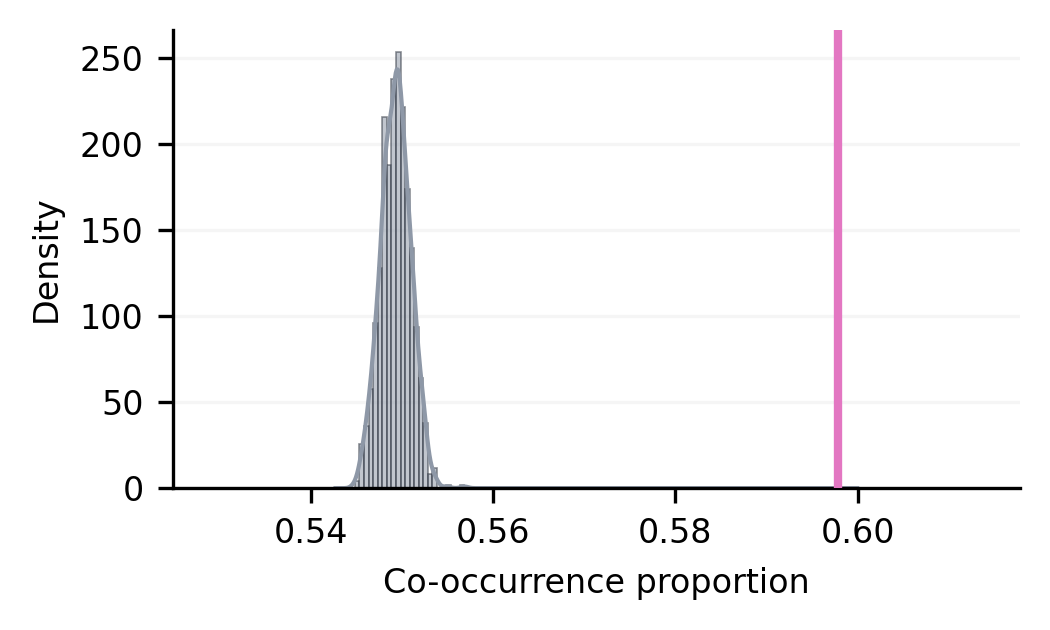

In [8]:
random_distr = random_distributions[3.5]
real_proportion = real_proportions[4]
fig, ax, p = plot_real_vs_shuffled(random_distr, real_proportion,
                                   xlabel="Co-occurrence proportion",
                                   alternative="greater",
                                   savepath="figures/real_vs_shifted_distribution.svg")
plt.show()

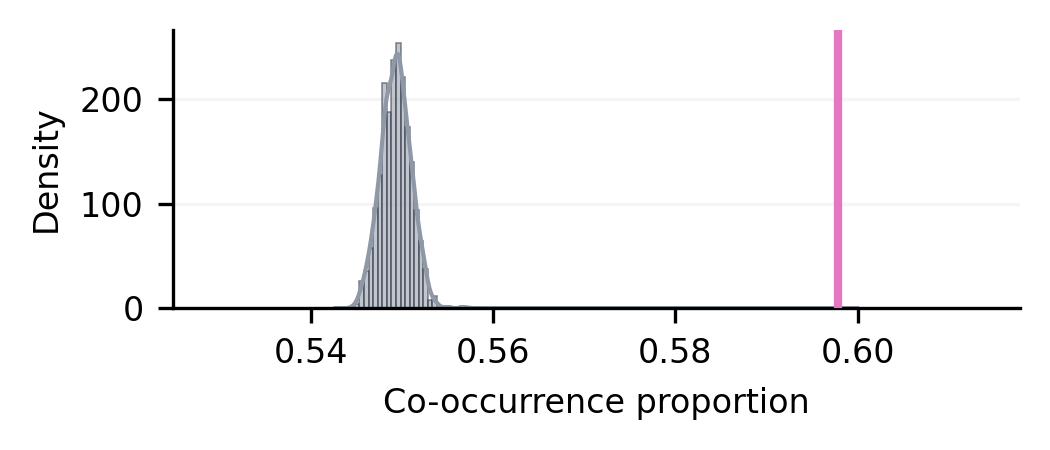

In [9]:
random_distr = random_distributions[3.5]
real_proportion = real_proportions[4]
fig, ax, p = plot_real_vs_shuffled(random_distr, real_proportion, figsize=(3.6, 1.6),
                                   xlabel="Co-occurrence proportion",
                                   alternative="greater",
                                   savepath="figures/real_vs_shifted_distribution.svg")
plt.show()

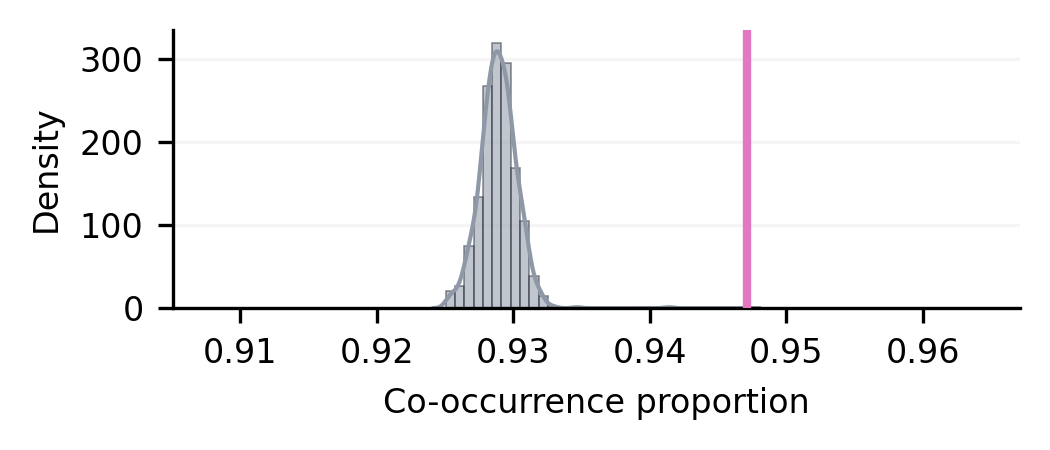

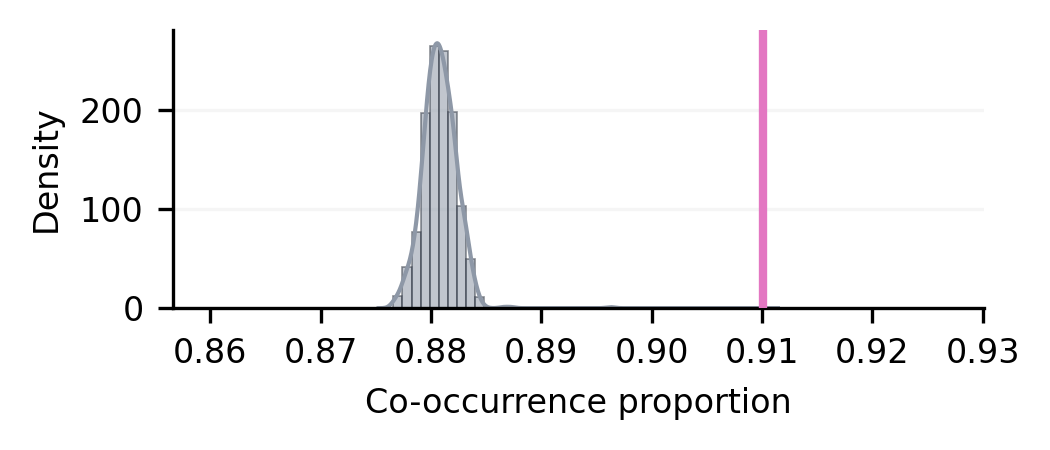

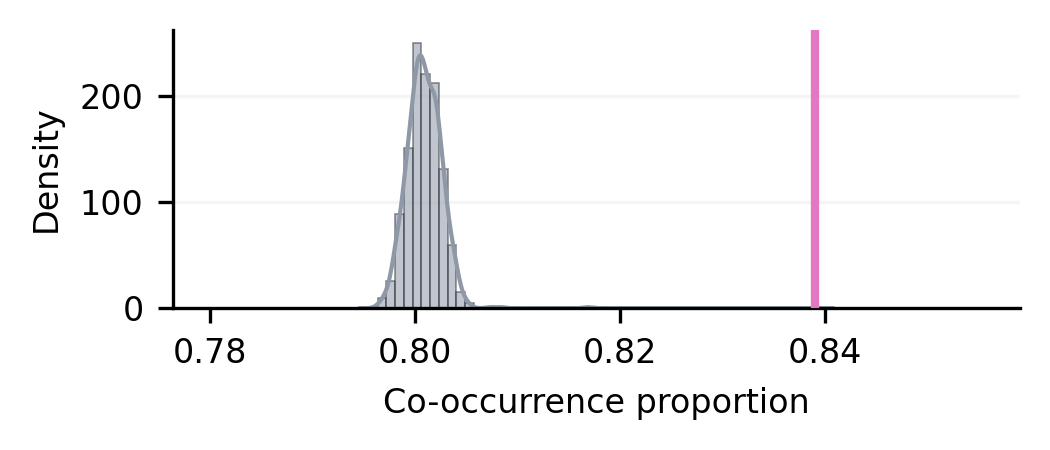

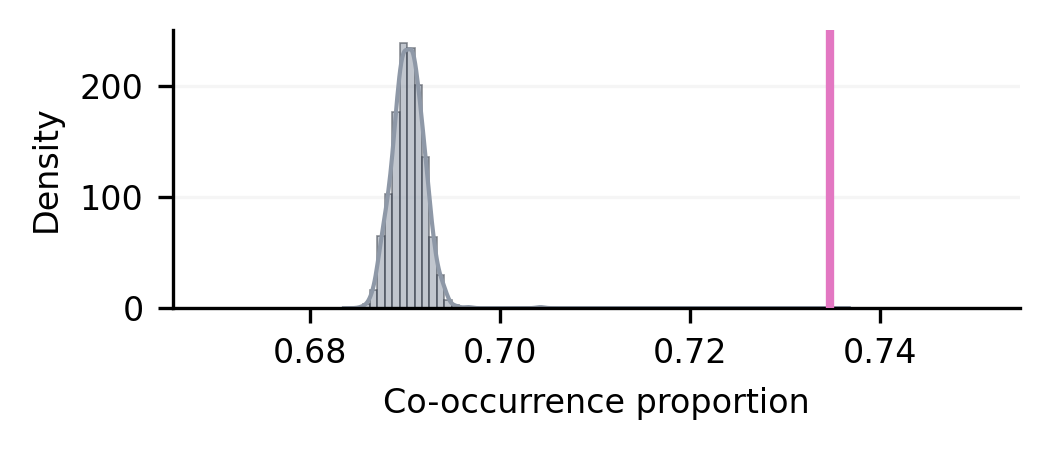

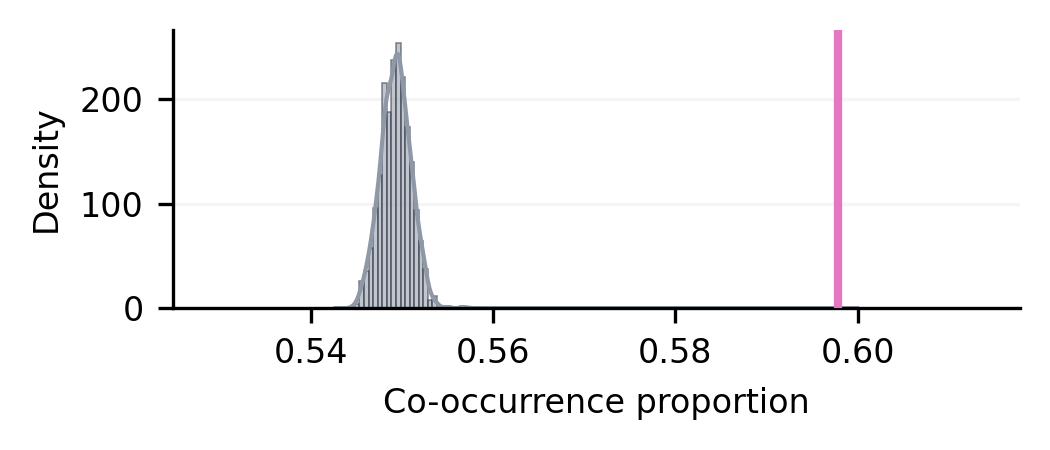

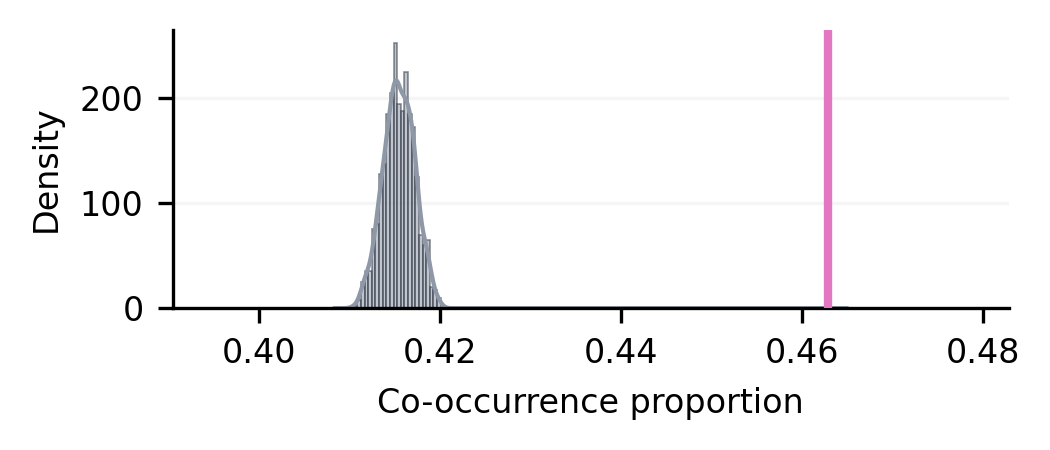

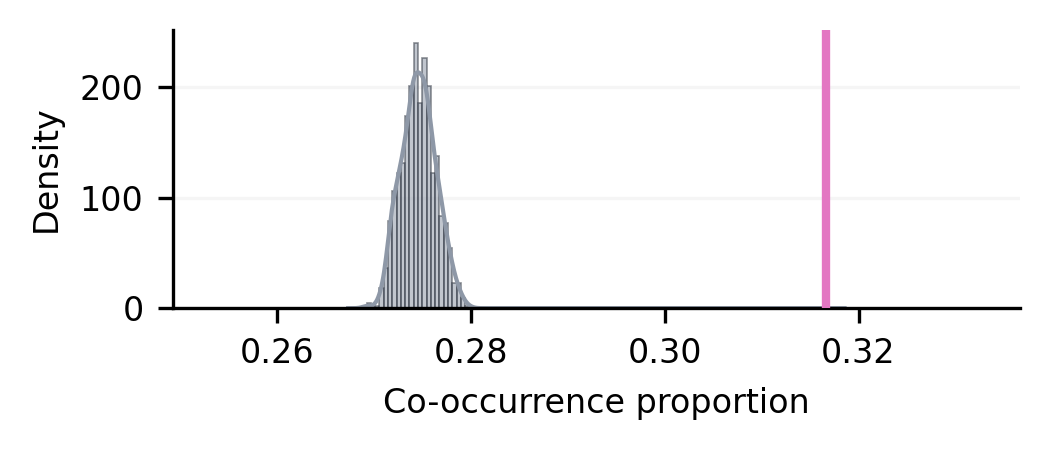

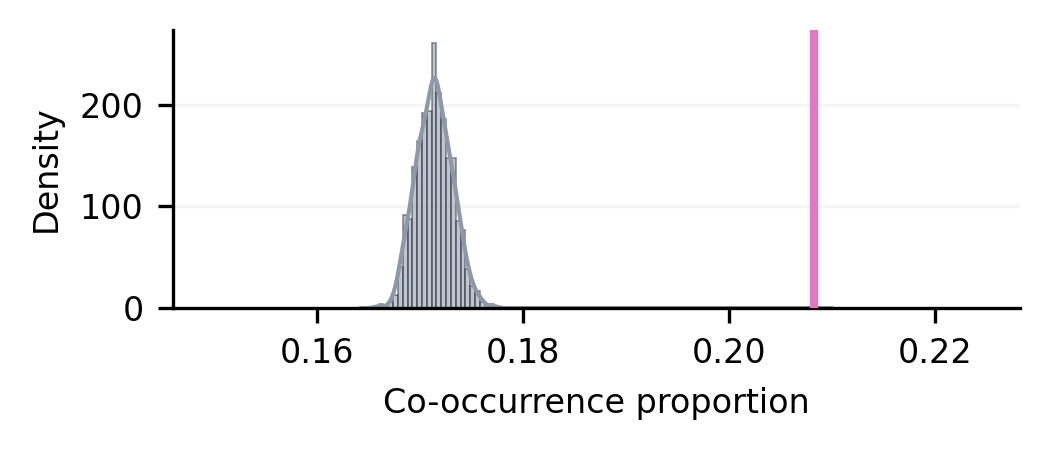

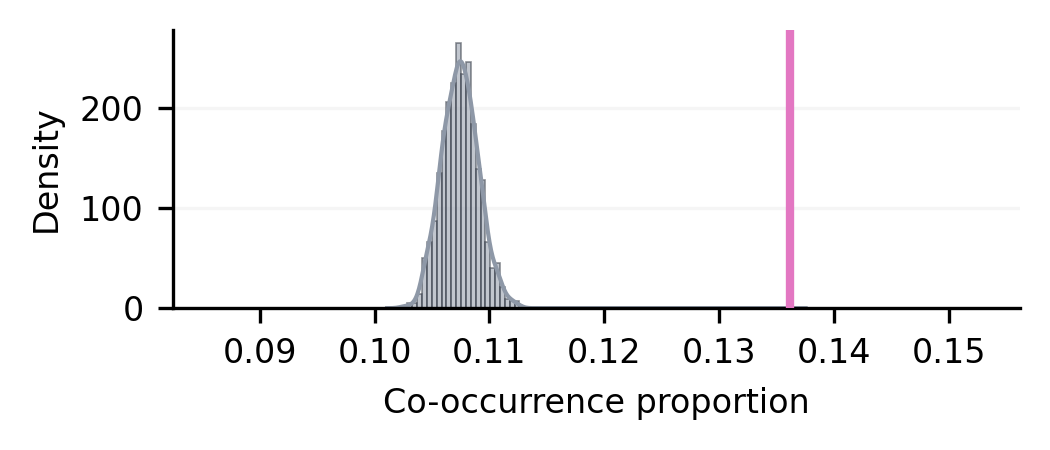

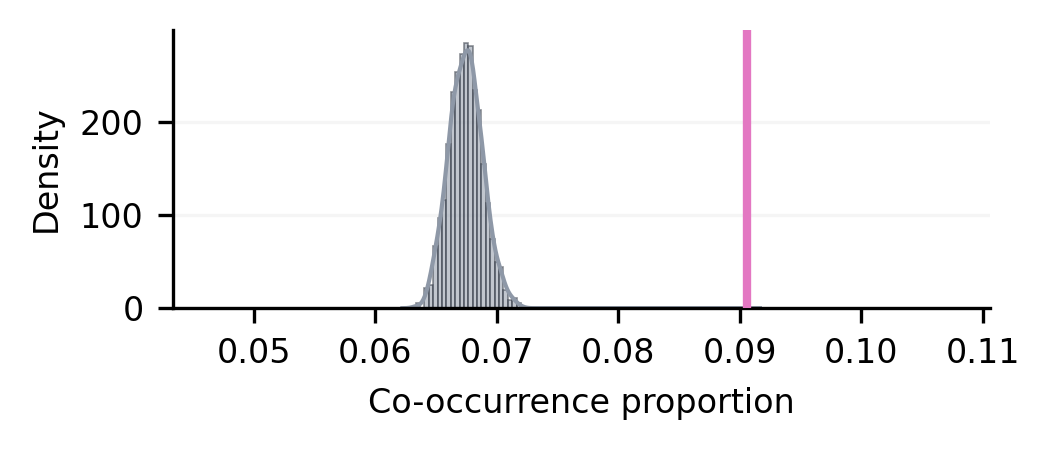

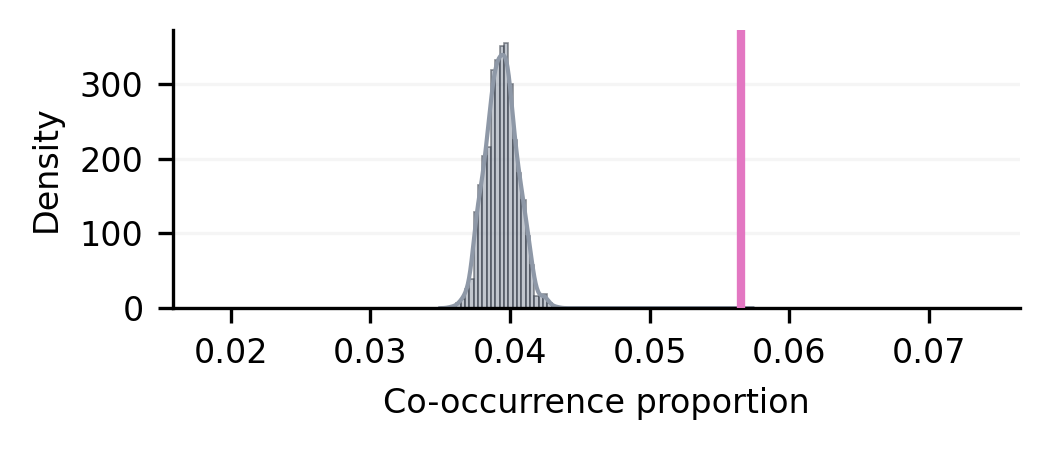

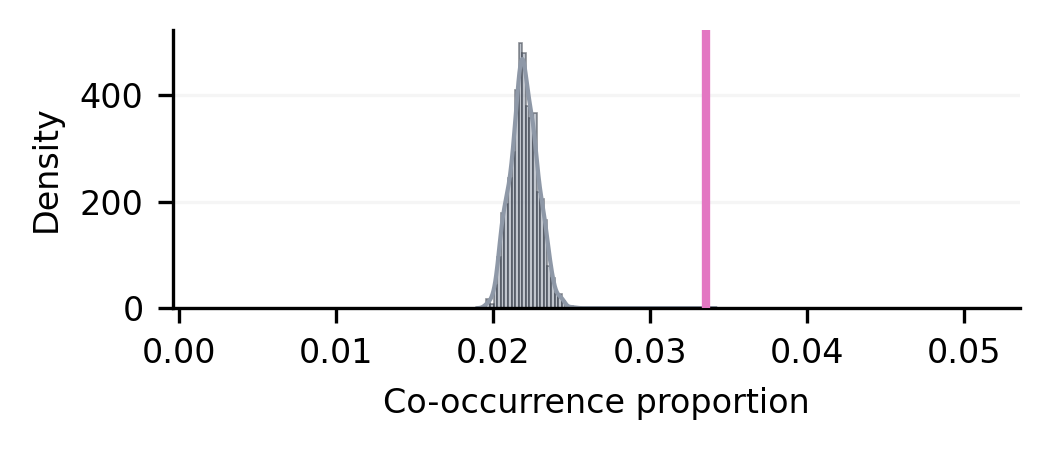

In [10]:
for count, thr in enumerate(list(random_distributions.keys())):
    random_distr = random_distributions[thr]
    real_proportion = real_proportions[count]
    fig, ax, p = plot_real_vs_shuffled(random_distr, real_proportion, figsize=(3.6, 1.6),
                                    xlabel="Co-occurrence proportion",
                                    alternative="greater",
                                    savepath="figures/real_vs_shifted_distribution_thr%.2f.svg" % thr)
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

EMO_NAMES = ["Happiness", "Surprise", "Sadness", "Anger", "Disgust", "Fear"]
COLOR_SHUFFLED = "#8E98A7"   
COLOR_REAL     = "#C6543F"   
EDGE_COLOR     = "#2E3440"
SPINE_COLOR    = "#D1D5DB"

def _pair_indices(n=6):
    return [(i, j) for i in range(n) for j in range(i+1, n)]

def _circ_roll_segment(x, shift):
    if shift == 0: return x
    shift %= len(x)
    return np.concatenate([x[-shift:], x[:-shift]])

def pair_coocc_prop(scores, i, j, thr, segments=None):
    """
    scores: (T, D)
    segments: None or [(s0,e0), (s1,e1), ...]
    """
    if segments is None:
        m = (scores[:, i] >= thr) & (scores[:, j] >= thr)
        return m.mean()
    num = 0; den = 0
    for (s, e) in segments:
        m = (scores[s:e, i] >= thr) & (scores[s:e, j] >= thr)
        num += m.sum(); den += (e - s)
    return num / max(1, den)

def pair_coocc_prop_shifted(scores, i, j, thr, B=1000, rng=None, segments=None):
    if rng is None: rng = np.random.default_rng()
    T = scores.shape[0]
    out = np.empty(B, float)

    if segments is None:
        xi, xj = scores[:, i], scores[:, j]
        for b in range(B):
            si = int(rng.integers(1, T))    # 避免 0 位移
            sj = int(rng.integers(1, T))
            mi = np.roll(xi, si) >= thr
            mj = np.roll(xj, sj) >= thr
            out[b] = np.mean(mi & mj)
        return out

    for b in range(B):
        num = 0; den = 0
        for (s, e) in segments:
            L = e - s
            si = int(rng.integers(1, L)); sj = int(rng.integers(1, L))
            xi = _circ_roll_segment(scores[s:e, i], si) > thr
            xj = _circ_roll_segment(scores[s:e, j], sj) > thr
            num += np.sum(xi & xj); den += L
        out[b] = num / max(1, den)
    return out

In [12]:
scores_sel = {}
sel_keys = ['forrest_gump', 'White_snake', 'Batman_darknight', 'World_War_Z']
for key in sel_keys:
    scores_sel[key] = scores_dict[key]

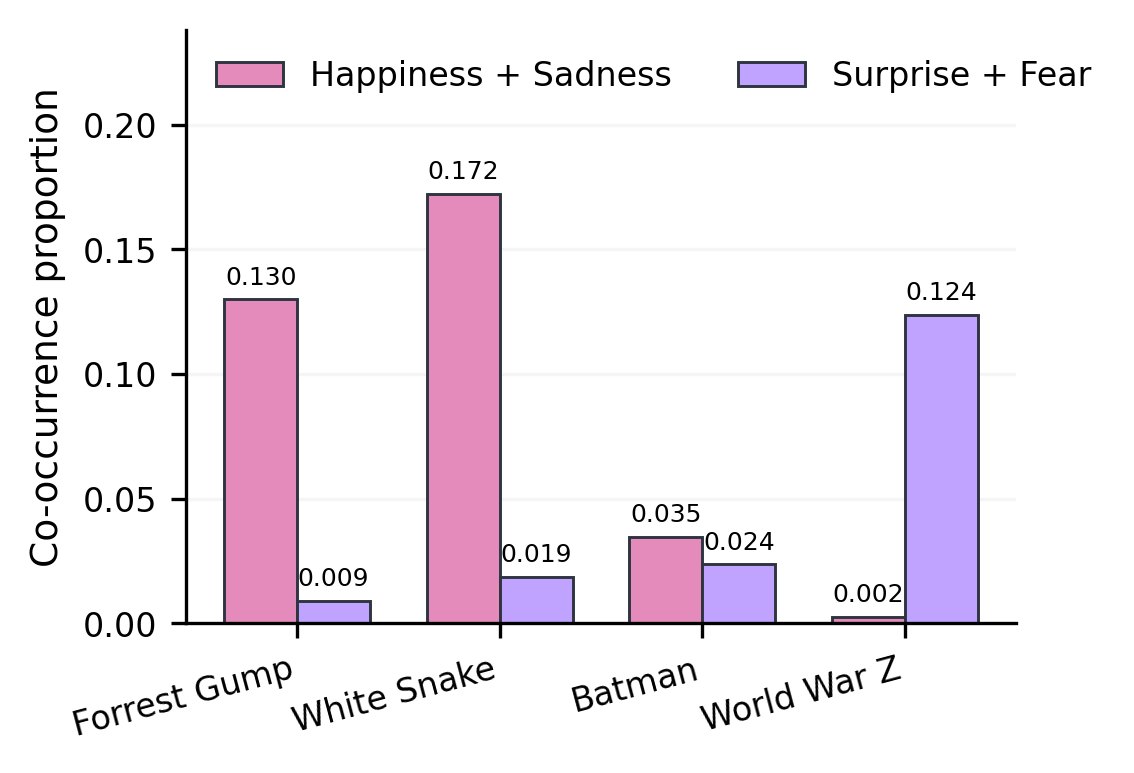

In [13]:
PAIR_COLORS = {
    "HS": "#E58BBB",  # Surprise + Fear
    "SF": "#BFA3FF",  # 柔和淡紫
}

pretty_name = {
    "forrest_gump": "Forrest Gump",
    "White_snake": "White Snake",
    "Batman_darknight": "Batman",
    "World_War_Z": "World War Z",
}

def _prop_pair(scores_sel, film_order, i, j, thr):
    return [pair_coocc_prop(scores_sel[k], i, j, thr, segments=None) for k in film_order]

def plot_compact_grouped_coocc(scores_sel, film_order, thr=3.5,
                               figsize=(5.6, 2.6), dpi=300, savepath=None):
    # 组合：Happiness+Sadness (0,2)；Surprise+Fear (1,5)
    props_HS = _prop_pair(scores_sel, film_order, 0, 2, thr)
    props_SF = _prop_pair(scores_sel, film_order, 1, 5, thr)
    labels   = [pretty_name.get(k, k) for k in film_order]

    import matplotlib.pyplot as plt
    from matplotlib.ticker import MaxNLocator

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    x = np.arange(len(film_order))
    w = 0.36

    bars1 = ax.bar(x - w/2, props_HS, width=w, color=PAIR_COLORS["HS"],
                   edgecolor=EDGE_COLOR, linewidth=0.7, label="Happiness + Sadness")
    bars2 = ax.bar(x + w/2, props_SF, width=w, color=PAIR_COLORS["SF"],
                   edgecolor=EDGE_COLOR, linewidth=0.7, label="Surprise + Fear")

    # 数值标注（更紧凑：贴近柱顶，字号小）
    for b in list(bars1) + list(bars2):
        h = b.get_height()
        ax.text(b.get_x() + b.get_width()/2, h + 0.004, f"{h:.3f}",
                ha="center", va="bottom", fontsize=6)

    # 轴与网格（紧凑风格）
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=15, ha="right")
    ax.yaxis.grid(True, linestyle='-', alpha=0.12)
    ax.set_axisbelow(True)
    for side in ["top", "right"]:
        ax.spines[side].set_visible(False)
    # ax.spines["left"].set_color(SPINE_COLOR)
    # ax.spines["bottom"].set_color(SPINE_COLOR)

    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.set_ylabel("Co-occurrence proportion", fontsize=9)

    ymax = max(props_HS + props_SF) if len(props_HS + props_SF) else 1.0
    ax.set_ylim(0, min(1.0, ymax * 1.15 + 0.04))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

    # 紧凑图例：放内侧上方，双列
    leg = ax.legend(loc="upper left", ncol=2, frameon=False, fontsize=8)
    plt.tight_layout(pad=0.8)

    if savepath:
        plt.savefig(savepath, bbox_inches="tight")
    return fig, ax

# —— 调用 ——
fig, ax = plot_compact_grouped_coocc(
    scores_sel=scores_sel,
    film_order=sel_keys,
    thr=3.5,
    figsize=(3.7, 2.6),
    dpi=300,
    savepath="figures/compact_grouped_coocc.svg"
)
plt.show()


In [14]:
from sklearn.decomposition import PCA
import matplotlib
emos = ["Happiness", "Surprise", "Sadness", "Anger", "Disgust", "Fear"]
loadings_mat = np.zeros((4,6))
evr = np.zeros(4)
for count, key in enumerate(sel_keys):
    scores_now = scores_sel[key]
    pca = PCA(n_components=6)
    X_pca = pca.fit_transform(scores_now)
    print("Explained variance ratio:", pca.explained_variance_ratio_)
    if key == 'Batman_darknight':
        loadings_mat[count,:] = -pca.components_.transpose()[:,2]
        evr[count] = pca.explained_variance_ratio_[2]
    else:
        loadings_mat[count,:] = -pca.components_.transpose()[:,1]
        evr[count] = pca.explained_variance_ratio_[1]

Explained variance ratio: [0.55249963 0.22969493 0.11926599 0.06118363 0.0264687  0.01088711]
Explained variance ratio: [0.5242119  0.25328417 0.13284918 0.05319922 0.02326835 0.01318718]
Explained variance ratio: [0.51807031 0.22554768 0.12143811 0.08327254 0.03097164 0.02069973]
Explained variance ratio: [0.46983971 0.25233248 0.14134958 0.07784627 0.03678276 0.0218492 ]


C:\Users\Windows\AppData\Local\Temp\ipykernel_57452\354612595.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.3)


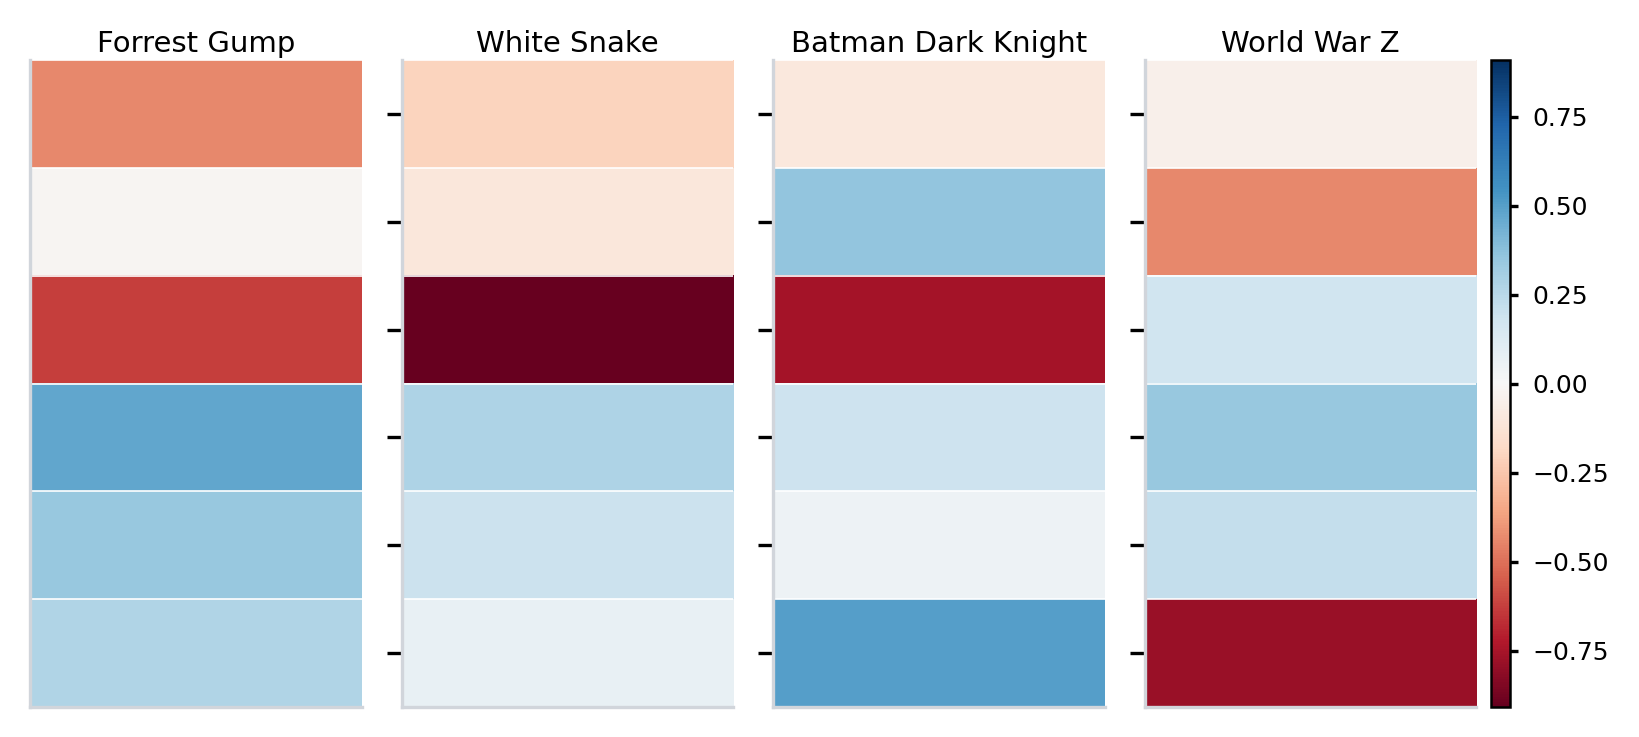

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

EMO_NAMES   = ["Happiness", "Surprise", "Sadness", "Anger", "Disgust", "Fear"]
SPINE_COLOR = "#D1D5DB"
EDGE_COLOR  = "#2E3440"

pretty_name = {
    "forrest_gump": "Forrest Gump",
    "White_snake": "White Snake",
    "Batman_darknight": "Batman Dark Knight",
    "World_War_Z": "World War Z",
}

def plot_vertical_loading_columns(loadings_mat, films, evr,
                                  figsize=(4.6, 1.9), dpi=300, savepath=None):

    L = np.asarray(loadings_mat, float)
    evr = np.asarray(evr, float)
    evr_pct = evr*100 if np.nanmax(evr) <= 1.05 else evr

    vmax = float(np.nanmax(np.abs(L))) if L.size else 1.0
    norm = TwoSlopeNorm(vmin=-vmax, vcenter=0.0, vmax=vmax)

    fig, axes = plt.subplots(
        1, 4, figsize=figsize, dpi=dpi, sharey=True,
        gridspec_kw={"wspace": 0.12}  # 更紧凑
    )

    ims = []
    for ax, row, film, ev in zip(axes, L, films, evr_pct):
        A = row[:, np.newaxis]
        im = ax.imshow(A, cmap="RdBu", norm=norm, interpolation="nearest",
                       aspect="auto")
        ims.append(im)

        ax.set_yticks(np.arange(len(EMO_NAMES)+1)-0.5, minor=True)
        ax.grid(which="minor", axis="y", color="white", linewidth=0.4)
        ax.tick_params(axis='y', which='minor', length=0)

        ax.set_xticks([])

        ax.set_yticks(np.arange(len(EMO_NAMES)))
        if ax is axes[0]:
            ax.set_yticklabels(EMO_NAMES, fontsize=6)
            ax.tick_params(axis='y', pad=1, length=0)
        else:
            ax.set_yticklabels([])

        ax.set_ylim(len(EMO_NAMES)-0.5, -0.5)

        for side in ["top", "right"]:
            ax.spines[side].set_visible(False)
        ax.spines["left"].set_color(SPINE_COLOR)
        ax.spines["bottom"].set_color(SPINE_COLOR)

        ax.set_title(f"{pretty_name.get(film, film)}",
                     fontsize=7, pad=2)

    cbar = fig.colorbar(ims[0], ax=axes, fraction=0.018, pad=0.01, aspect=35)
    cbar.ax.tick_params(labelsize=6, length=2)
    cbar.outline.set_linewidth(0.6)
    
    plt.tight_layout(pad=0.3)
    if savepath:
        plt.savefig(savepath, bbox_inches="tight", pad_inches=0.02)
    return fig, axes


films = ['forrest_gump', 'White_snake', 'Batman_darknight', 'World_War_Z']
fig, axes = plot_vertical_loading_columns(loadings_mat, films, evr,
                                          figsize=(6.4, 2.8), dpi=300,
                                          savepath="figures/pca_loading_columns.svg")
plt.show()


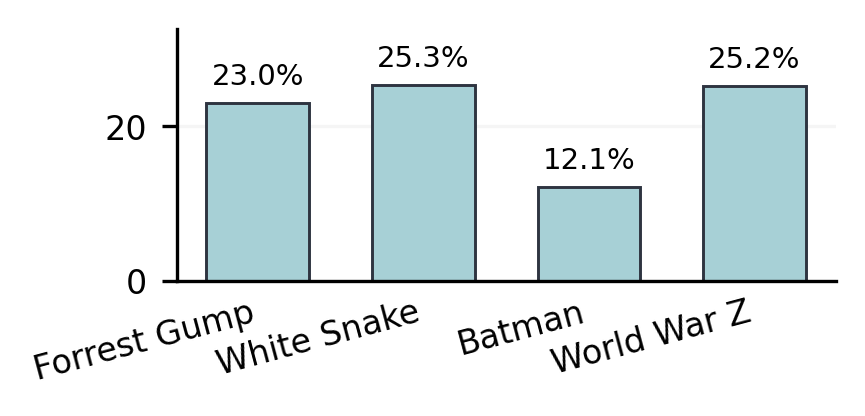

In [18]:
import numpy as np
import matplotlib.pyplot as plt

SPINE_COLOR = "#D1D5DB"
EDGE_COLOR  = "#2E3440"
BAR_COLOR   = "#A7D0D6"   

pretty_name = {
    "forrest_gump": "Forrest Gump",
    "White_snake": "White Snake",
    "Batman_darknight": "Batman",
    "World_War_Z": "World War Z",
}

def plot_ev_bars_vertical_value(films, evr, figsize=(4.0, 2.4), dpi=300, savepath=None):
    # plt.rcParams['font.size']=10
    films = list(films)
    evr = np.asarray(evr, float)
    evr_pct = evr * 100.0 if np.nanmax(evr) <= 1.05 else evr

    labels = [pretty_name.get(k, k) for k in films]
    x = np.arange(len(films))

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    bars = ax.bar(x, evr_pct, width=0.62, color=BAR_COLOR,
                  edgecolor=EDGE_COLOR, linewidth=0.7)

    ymax = float(np.nanmax(evr_pct)) if evr_pct.size else 100.0
    pad  = max(1.6, 0.01 * max(100.0, ymax)) 

    for xx, hh, name in zip(x, evr_pct, labels):
        inside_y = hh * 0.55 if hh >= 10 else min(hh * 0.70 + 2.0, hh - 0.4) if hh > 2 else 1.0

        ax.text(xx, hh + pad, f"{hh:.1f}%", ha="center", va="bottom",
                fontsize=7, clip_on=False)

    ax.set_xticks(np.arange(4))
    ax.set_xticklabels(labels, rotation=15, ha="right", fontsize=8)  
    ax.yaxis.grid(True, linestyle='-', alpha=0.12)
    ax.set_axisbelow(True)

    for side in ["top", "right"]:
        ax.spines[side].set_visible(False)
    # ax.spines["left"].set_color(SPINE_COLOR)
    # ax.spines["bottom"].set_color(SPINE_COLOR)

    ax.tick_params(axis='x', length=0)
    ax.tick_params(axis='y', labelsize=8)

    ax.set_ylim(0, min(100.0, ymax * 1.22 + pad))  # 给竖排数值留足空间
    plt.tight_layout(pad=0.4)

    if savepath:
        plt.savefig(savepath, bbox_inches="tight")
    return fig, ax

films = ['forrest_gump', 'White_snake', 'Batman_darknight', 'World_War_Z']
# evr = [0.31, 0.28, 0.35, 0.26]  # 或 [31.0, 28.0, 35.0, 26.0]
fig, ax = plot_ev_bars_vertical_value(films, evr,
    figsize=(2.8, 1.3), dpi=300, savepath="figures/ev_bar_soft_vertical.svg")
plt.show()


#### Example curves (Forrest Gump)

In [19]:
sel_keys

['forrest_gump', 'White_snake', 'Batman_darknight', 'World_War_Z']

(4218, 6)


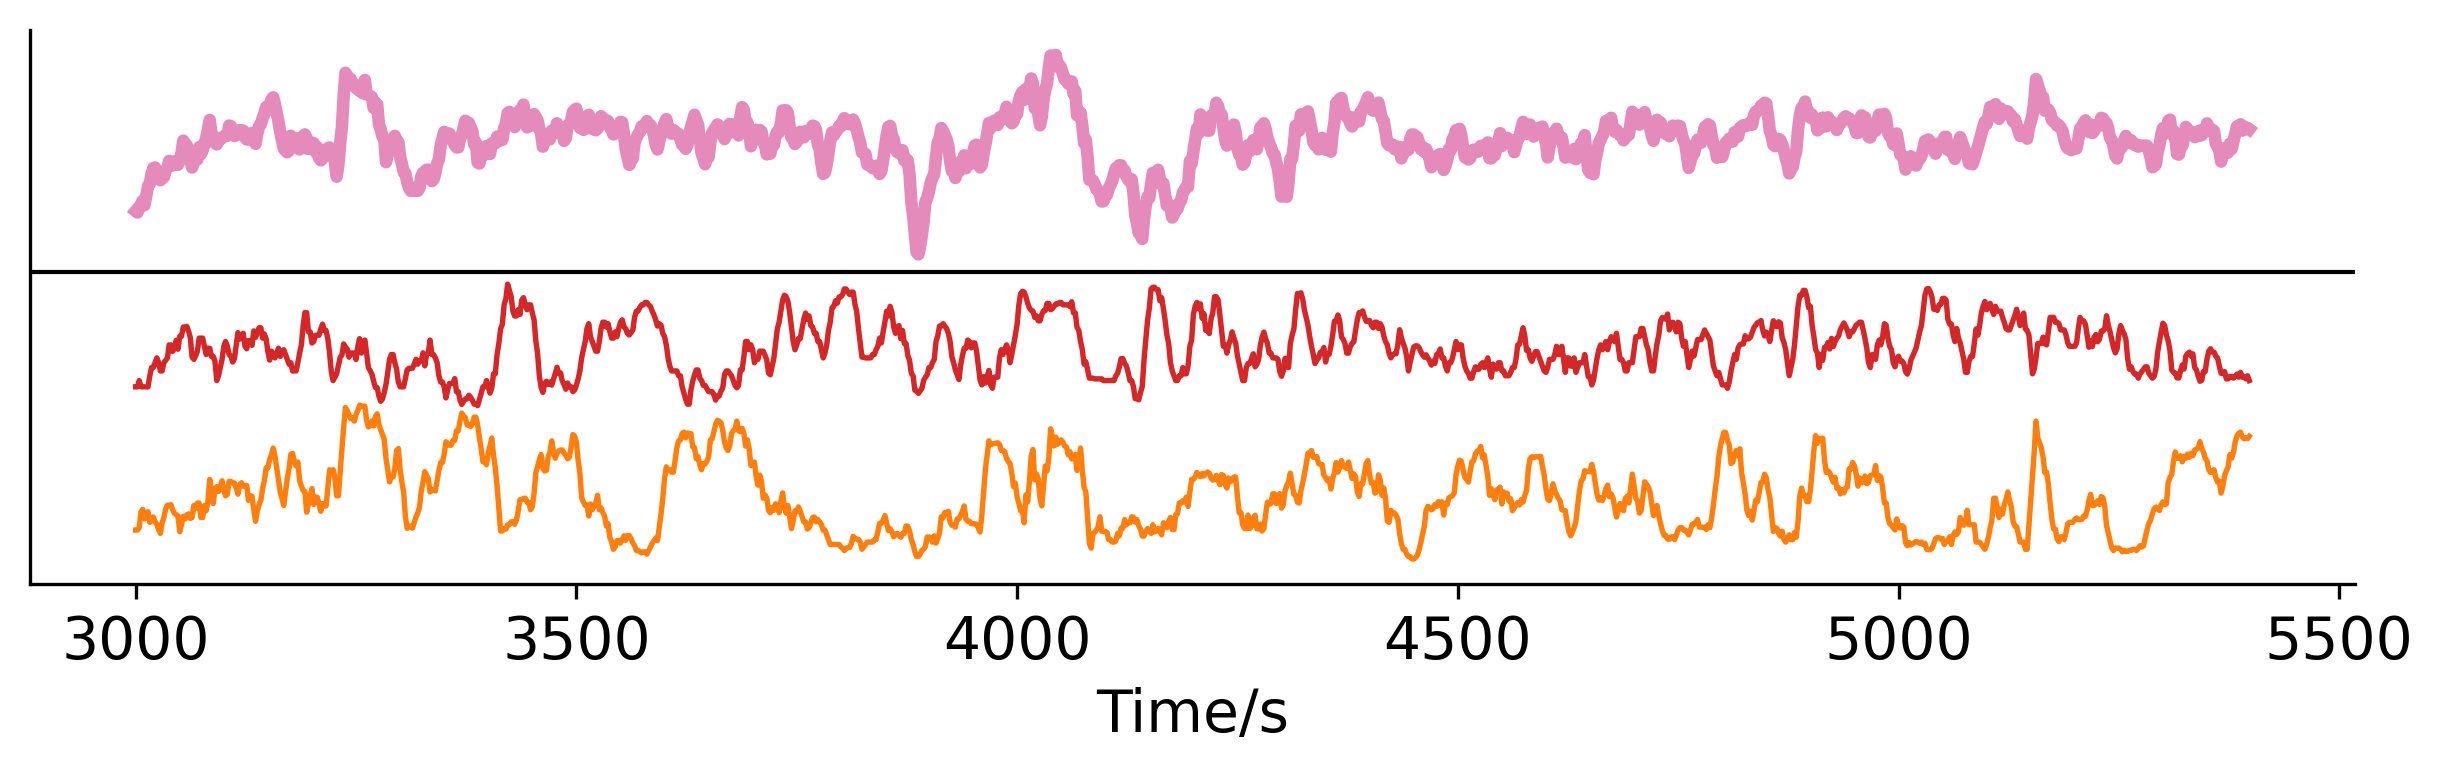

4


In [21]:
emos = ["Happiness", "Surprise", "Sadness", "Anger", "Disgust", "Fear"]
EMO_COLORS = ['#d62728', '#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b']

sel_range = np.arange(1500,2700)
loadings_mat = np.zeros((4,6))
evr = np.zeros(4)
plt.rcParams['font.size'] = 14
for count, key in enumerate(sel_keys[:1]):
    scores_now = scores_sel[key]
    pca = PCA(n_components=6)
    X_pca = pca.fit_transform(scores_now)
    print(X_pca.shape)
    fig, ax = plt.subplots(figsize=(10,2.4), dpi=300)
    plt.plot(sel_range*2, X_pca[sel_range,1]+18, color="#E58BBB", linewidth=3)
    plt.plot(sel_range*2, scores_now[sel_range,0]+5, color=EMO_COLORS[0], linewidth=1.3)
    plt.plot(sel_range*2, scores_now[sel_range,2], color=EMO_COLORS[2], linewidth=1.3)
    plt.axhline(12, color='k', linewidth=1)
    plt.yticks([])
    plt.xlabel('Time/s')
    for side in ["top", "right"]:
        ax.spines[side].set_visible(False)
    # ax.spines["left"].set_color(SPINE_COLOR)
    # ax.spines["bottom"].set_color(SPINE_COLOR)
    plt.savefig('figures/ha_sa_curves_fg.svg', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(np.argmin(X_pca[2500:2600,1]))
    
    # plt.figure(figsize=(15,6))
    # for i in range(6):
    #     plt.plot(np.arange(0,X_pca.shape[0]*2,2), scores_now[:,i]+4*i, color=EMO_COLORS[i])
    # plt.show()

In [22]:
2578/60*2

85.93333333333334

In [23]:
scores_now[2022,:]

array([5.68, 4.39, 5.15, 1.07, 0.83, 0.68])

In [24]:
X_pca[2019:2023,1]

array([2.98312058, 2.80631954, 2.70119653, 3.00624619])

In [26]:
# 2019
with open(r'\\10.16.57.94\dataset1\xinke\Danmu\DyEmo-submit\DyEmo-Forrest\Processed_danmu\danmu_Forrest_Gump_downsample.pkl', 'rb') as f:
    danmu = pickle.load(f)
print(len(danmu['forrest_gump.csv']))

5756


In [27]:
danmu['forrest_gump.csv_time_range'][i][1]

1291.0

In [28]:
time_points = np.array([np.mean([danmu['forrest_gump.csv_time_range'][i][0], danmu['forrest_gump.csv_time_range'][i][1]]) for i in range(5756)])
print(np.argmin(np.abs(time_points-2022*2)))
print(time_points[2829])

2829
4044.0


In [29]:
4044/60

67.4

In [30]:
print(danmu['forrest_gump.csv'][2829])

如果是去见你 我一定是跑着去的！
想哭
第一次看的时候，惊讶这池子原来不需要游泳就能过
最好的反战宣言
跌跌撞撞奔向你
名场面
史诗构图
名场面
这也太。。
呜呜呜呜呜呜呜呜呜
想要知道说了什么的，网上会有大量的信息告诉你
谢谢你一直守候着这份笨拙且执着的爱
老实人系列
原来这池子这么浅的啊
名画
双向的奔赴就会幸福吗
所以阿甘到底说了啥？
名场面合影
当年看到这里哭了
南北一拥


#### Example curves (World War Z)

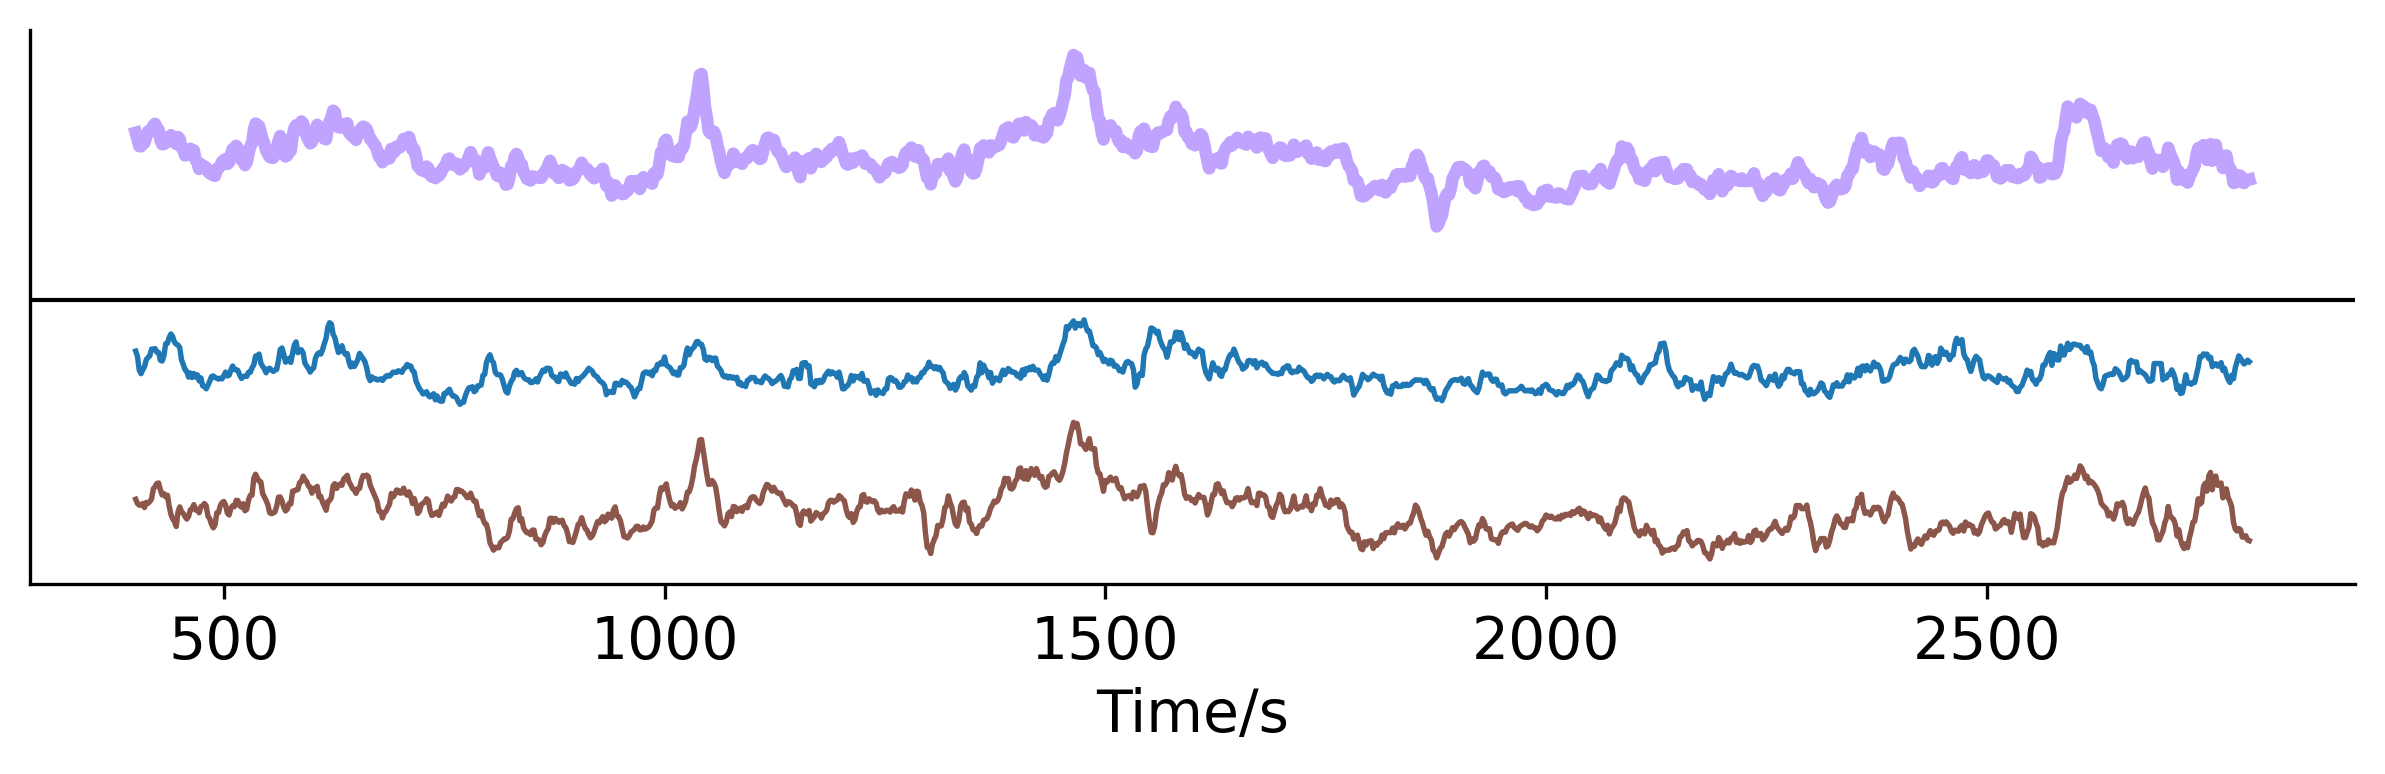

103


In [31]:
emos = ["Happiness", "Surprise", "Sadness", "Anger", "Disgust", "Fear"]
EMO_COLORS = ['#d62728', '#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b']


loadings_mat = np.zeros((4,6))
evr = np.zeros(4)
plt.rcParams['font.size'] = 14
for count, key in enumerate(sel_keys[3:]):
    scores_now = scores_sel[key]
    sel_range = np.arange(200,1400)
    pca = PCA(n_components=6)
    X_pca = pca.fit_transform(scores_now)
    fig, ax = plt.subplots(figsize=(10,2.4), dpi=300)
    plt.plot(sel_range*2, X_pca[sel_range,1]+18, color="#BFA3FF", linewidth=3)
    plt.plot(sel_range*2, scores_now[sel_range,1]+5, color=EMO_COLORS[1], linewidth=1.3)
    plt.plot(sel_range*2, scores_now[sel_range,5], color=EMO_COLORS[5], linewidth=1.3)
    plt.axhline(12, color='k', linewidth=1)
    plt.yticks([])
    plt.xlabel('Time/s')
    for side in ["top", "right"]:
        ax.spines[side].set_visible(False)
    # ax.spines["left"].set_color(SPINE_COLOR)
    # ax.spines["bottom"].set_color(SPINE_COLOR)
    plt.savefig('figures/ha_sa_curves_wwz.svg', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(np.argmax(X_pca[1200:1400,1]))

In [32]:
1303*2/60

43.43333333333333

In [33]:
print(scores_now[732,:])
print(X_pca[728:739])

[0.85 6.05 0.   1.8  0.95 6.55]
[[ 0.66189273  3.73574949 -0.6908031  -0.42444386  0.90593834 -0.09802682]
 [ 1.06377708  3.84893849 -0.70580656 -0.58878552  0.68055807 -0.04657133]
 [ 1.40736376  4.26290164 -1.1720233  -0.79949478  0.86648859 -0.08847716]
 [ 1.70329559  4.56409911 -1.6029171  -0.97523289  1.03370678 -0.1988817 ]
 [ 1.90179453  4.84922894 -1.7749299  -1.16567638  1.03692051 -0.44572516]
 [ 1.91885223  4.47590766 -1.75413398 -1.16878173  0.82387511 -0.28663463]
 [ 1.86619404  4.75291774 -1.70587698 -1.08510358  0.94465163 -0.01446778]
 [ 1.65365943  4.37269507 -1.10280157 -1.13917657  0.77787548 -0.04313185]
 [ 1.2065238   3.9262816  -0.84051283 -1.06225738  0.76077037  0.0141413 ]
 [ 1.06819159  4.03866992 -0.78889445 -0.98111073  0.83426068  0.22881083]
 [ 0.66099411  4.17964874 -0.71621454 -0.86080373  0.95970679  0.20595662]]


In [35]:
with open(r'\\10.16.57.94\dataset1\xinke\Danmu\DyEmo-submit\DyEmo-FullMovies\Processed_danmu\danmu_World_War_Z_downsample.pkl', 'rb') as f:
    danmu = pickle.load(f)
print(danmu.keys())
print(len(danmu['World_War_Z.csv']))

time_points = np.array([np.mean([danmu['World_War_Z.csv_time_range'][i][0], danmu['World_War_Z.csv_time_range'][i][1]]) for i in range(len(danmu['World_War_Z.csv']))])
print(np.argmin(np.abs(time_points-732*2)))
print(time_points[1381])

dict_keys(['World_War_Z.csv', 'World_War_Z.csv_time_range'])
6326
1381
1464.0


In [36]:
1464/60

24.4

In [37]:
print(danmu['World_War_Z.csv'][1381])

啊啊啊啊啊啊啊啊啊啊啊啊
操
卧槽吓我一跳
感谢高能君 木有被吓到
艾玛吓死我
谢谢高能，让我及时关掉了音量
卧槽，卧槽，被吓一激灵
握草！！！！！！
草
吓死啦
感谢高能君
吓死人
我TM的
我为什么这个时候按快进T_T
草
感谢高能君
握草
wdnmd
来了/
跪谢高能君


### Statistics according to movie genres

In [38]:
scores_dict.keys()

dict_keys(['Batman_darknight', 'Be_somebody', 'forrest_gump', 'Gashapon', 'Godzilla', 'Green_book', 'Harry_potter', 'Heidi', 'Kong_fu', 'let_bullet_fly_reorder', 'Luo_xiao_hei', 'The_bad_guys', 'The_Shawshank_Redemption', 'The_Wandering_Earth_II', 'Weathering_With_You', 'White_snake', 'World_War_Z', 'Yang_jian', 'BV1134y1g7Vq', 'BV11x4y117NY', 'BV147411y71D', 'BV14b411c72z', 'BV14E411C7Lf', 'BV14T4y1u7ST', 'BV163411i7Un', 'BV164411k73g', 'BV16e4y1P7sa', 'BV17f4y1n7et', 'BV17h411D7aX', 'BV17W411r78v', 'BV17W411Z7Lh', 'BV18E411e7By', 'BV191421B7B9', 'BV19x41127Nd', 'BV1BJ411S7Ch', 'BV1bL411578p', 'BV1bz4y1a7QZ', 'BV1cW411a7ed', 'BV1Ds411V7cP', 'BV1dU4y1g73N', 'BV1Dx411u7jw', 'BV1e4411k74a', 'BV1E4411U7Qu', 'BV1ED4y1j7Jn', 'BV1Ee4y1B74h', 'BV1eJ411B7to', 'BV1Fb411F7fk', 'BV1Fb411z7Zy', 'BV1ht4y1D7tG', 'BV1j4411X7CV', 'BV1j44y1y7YQ', 'BV1kJ411j7pH', 'BV1kK4y1b7dH', 'BV1Kx411p7hz', 'BV1ky4y167Tg', 'BV1Lp411R7Fx', 'BV1LP4y1H7TJ', 'BV1M7411J7kP', 'BV1ms411U75B', 'BV1mw4m1e7BD', 'BV1na4y1Y7rR'

In [ ]:
# Movie names
import pandas as pd
import pickle
with open(r'\\10.16.57.94\dataset1\xinke\Danmu\DyEmo-submit\DyEmo-FullMovies\Emotion_scores\scores_allMovies_resample.pkl', 'rb') as f:
    scores_dict = pickle.load(f)
keys = list(scores_dict.keys())
file_path = r'\\10.16.57.94\dataset1\xinke\Danmu\DyEmo-submit\movie_info_submit.CSV'  

df = pd.read_csv(file_path)
eng_names = df['Movie title'].astype(str).tolist()  
eng_names = [eng_names[i][1:] for i in range(len(eng_names))]

movie_names_eng = [
    "Batman Dark Knight",
    "Be Somebody",
    "Forrest Gump",
    "Big World Gashapon",
    "Godzilla",
    "Green Book",
    "Harry Potter and the Goblet of Fire",
    "Heidi",
    "Kung Fu",
    "Let the Bullets Fly",
    "The Legend of Luo Xiaohei",
    "The Bad Guys",
    "The Shawshank Redemption",
    "The Wandering Earth II",
    "Weathering With You",
    "White Snake",
    "World War Z",
    "Yang Jian",
    "Suzume",  # 铃芽之旅
    "Johnny Keep Walking!",  # 年会不能停!
    "The Lord of the Rings: The Fellowship of the Ring",  # 指环王1
    "The SpongeBob SquarePants Movie",  # 海绵宝宝历险记
    "Our Fathers",  # 我们的父辈
    "Detective Conan: The Phantom of Baker Street",  # 名侦探柯南
    "Love Letter",  # 情书
    "Harry Potter and the Order of the Phoenix",
    "Detective Conan: The Bride of Halloween",
    "White Snake 2: The Tribulation of Green Snake",
    "New Gods: Nezha Reborn",
    "The Truman Show",  # 楚门的世界
    "Transformers",
    "Flipped",  # 怦然心动
    "The Pig, the Snake and the Pigeon",  # 周处除三害
    "Date A Live Movie: Mayuri Judgment",
    "Rascal Does Not Dream of a Dreaming Girl",
    "Violet Evergarden: The Movie",
    "Journey to the West",  # 宇宙探索编辑部
    "Sword Art Online: Ordinal Scale",  # 刀剑神域
    "Overlord: The Dark Hero",
    "Rurouni Kenshin",  # 浪客剑心
    "A Silent Voice",  # 声之形
    "Harry Potter and the Half-Blood Prince",
    "Harry Potter and the Chamber of Secrets",
    "Still Miss You",  # 还是觉得你最好
    "Ready Player One",  # 头号玩家
    "Edge of Tomorrow",  # 明日边缘
    "Transformers: Revenge of the Fallen",
    "Fate/stay night: Heaven's Feel I. presage flower",
    "Fantastic Beasts and Where to Find Them",
    "Harry Potter and the Sorcerer's Stone",
    "Promare",  # 普罗米亚
    "Fireworks",  # 烟花
    "Goodbye Mr. Loser",  # 夏洛特烦恼
    "Tamako Love Story",  # 玉子爱情故事
    "Leap",  # 夺冠
    "A Little Thing Called Love",  # 初恋这件小事
    "The Legend of Sealed Book",  # 天书奇谭
    "The SpongeBob Movie: Sponge Out of Water",  # 海绵宝宝水兵陆战队
    "The Garden of Words",  # 言叶之庭
    "Kowloon Walled City",  # 九龙城寨
    "The Silence of the Lambs",
    "Inception",  # 盗梦空间
    "Interstellar",
    "Deep Sea",  # 深海
    "Jiang Ziya",  # 姜子牙
    "Harry Potter and the Deathly Hallows Part 2",
    "CJ7",  # 长江七号
    "Lost on Journey",  # 人在囧途
    "Only Fools Rush In",  # 四海
    "Five Hundred Miles",  # 交换人生
    "The Godfather",
    "Harry Potter and the Prisoner of Azkaban",
    "Minions",  # 小黄人大眼萌
    "Violet Evergarden: Eternity and the Auto Memories Doll",
    "One Second",  # 一秒钟
    "Sword Art Online Progressive: Aria of a Starless Night",
    "Catch Me If You Can",  # 猫鼠游戏
    "Wolf Warrior",  # 战狼
    "Brotherhood of Blades",  # 绣春刀
    "Hidden Blade",  # 无名
    "Endless Journey",  # 三大队
    "Pegasus 2",  # 飞驰人生2
    "Evangelion: 2.22 You Can (Not) Advance",
    "Evangelion: 3.33 You Can (Not) Redo",
    "Evangelion: 1.11 You Are (Not) Alone",
    "Evangelion: Death and Rebirth",
    "Crazy Racer",  # 疯狂的赛车
    "My Little Pony Equestria Girls: Friendship Games",  # 彩虹小马
    "My Own Swordsman",  # 武林外传
    "Words Bubble Up Like Soda Pop",  # 言语如苏打般涌现
    "No Time to Die",  # 007
    "Overlord: The Undead King",
    "5 Centimeters Per Second",  # 秒速5厘米
    "Win the Kids",  # 抓娃娃
    "The Founding of a Republic",  # 建国大业
    "Ip Man",  # 叶问
    "The King's Avatar: For the Glory",  # 全职高手
    "Shin Ultraman",  # 新·奥特曼
    "Pleasant Goat and Big Big Wolf: Dunk for Future",  # 喜羊羊
    "One Piece Film: Red",  # 航海王
    "Johnny English",  # 憨豆特工
    "Pacific Rim"  # 环太平洋
]

In [41]:
df.head()

,No.,Movie title,Movie genre,Duration (s)
0,1,Batman Dark Knight,Drama/Action/Sci-Fi/ComicAdaptation,9130
1,2,Be Somebody,Mystery/Comedy/Drama,7398
2,3,Forrest Gump,Drama/Romance/NovelAdaptation,8436
3,4,Big World Gashapon,Drama/Comedy/Romance/Sci-Fi,2316
4,5,Godzilla,Action/Sci-Fi/Adventure/Disaster,7910


In [42]:
df = pd.read_csv(r'\\10.16.57.94\dataset1\xinke\Danmu\DyEmo-film\movie_6cluster_onehot.csv')
# action = np.array(df['Neutral Action'].tolist())[:-1]
# for name in df[df['Poetic Surges']==1].iloc[:,0].tolist():
#     if name not in movie_names_eng:
#         print(name)

In [43]:
action_movie = df[df['Resonant Sadness']==1].iloc[:,0].tolist()
print(len(action_movie), action_movie)
print([(movie_names_eng[i] in action_movie) for i in range(len(movie_names_eng))])
action=np.array([movie_names_eng[i] in action_movie for i in range(len(movie_names_eng))])
keys_action=[keys[i] for i in range(102) if action[i]==1]

Poetic_movie = df[df['Complex Flux']==1].iloc[:,0].tolist()

9 ['Heidi', 'White Snake', 'Johnny Keep Walking!', 'Violet Evergarden: The Movie', 'Leap', 'A Little Thing Called Love', 'Harry Potter and the Deathly Hallows Part 2', 'Pegasus 2', 'Pleasant Goat and Big Big Wolf: Dunk for Future']
[False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False]


In [44]:
cluster_name=[
    "Resonant Sadness",
    "Complex Flux",
    "Sustained Joy",
    "Neutral Action",
    "Poetic Surges",
    "Epic Escalations",
]

24 ['Be Somebody', 'The Shawshank Redemption', 'The Wandering Earth II', 'Suzume', 'Harry Potter and the Order of the Phoenix', 'White Snake 2: The Tribulation of Green Snake', 'The Truman Show', 'Kowloon Walled City', 'The Silence of the Lambs', 'Inception', 'Interstellar', 'Deep Sea', 'CJ7', 'Only Fools Rush In', 'The Godfather', 'One Second', 'Catch Me If You Can', 'Hidden Blade', 'Endless Journey', 'Crazy Racer', 'Words Bubble Up Like Soda Pop', 'No Time to Die', 'Win the Kids', 'The Founding of a Republic']
[False, True, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, True, False, False, False, False, False, False, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, False, False, True, False, True, False, True,

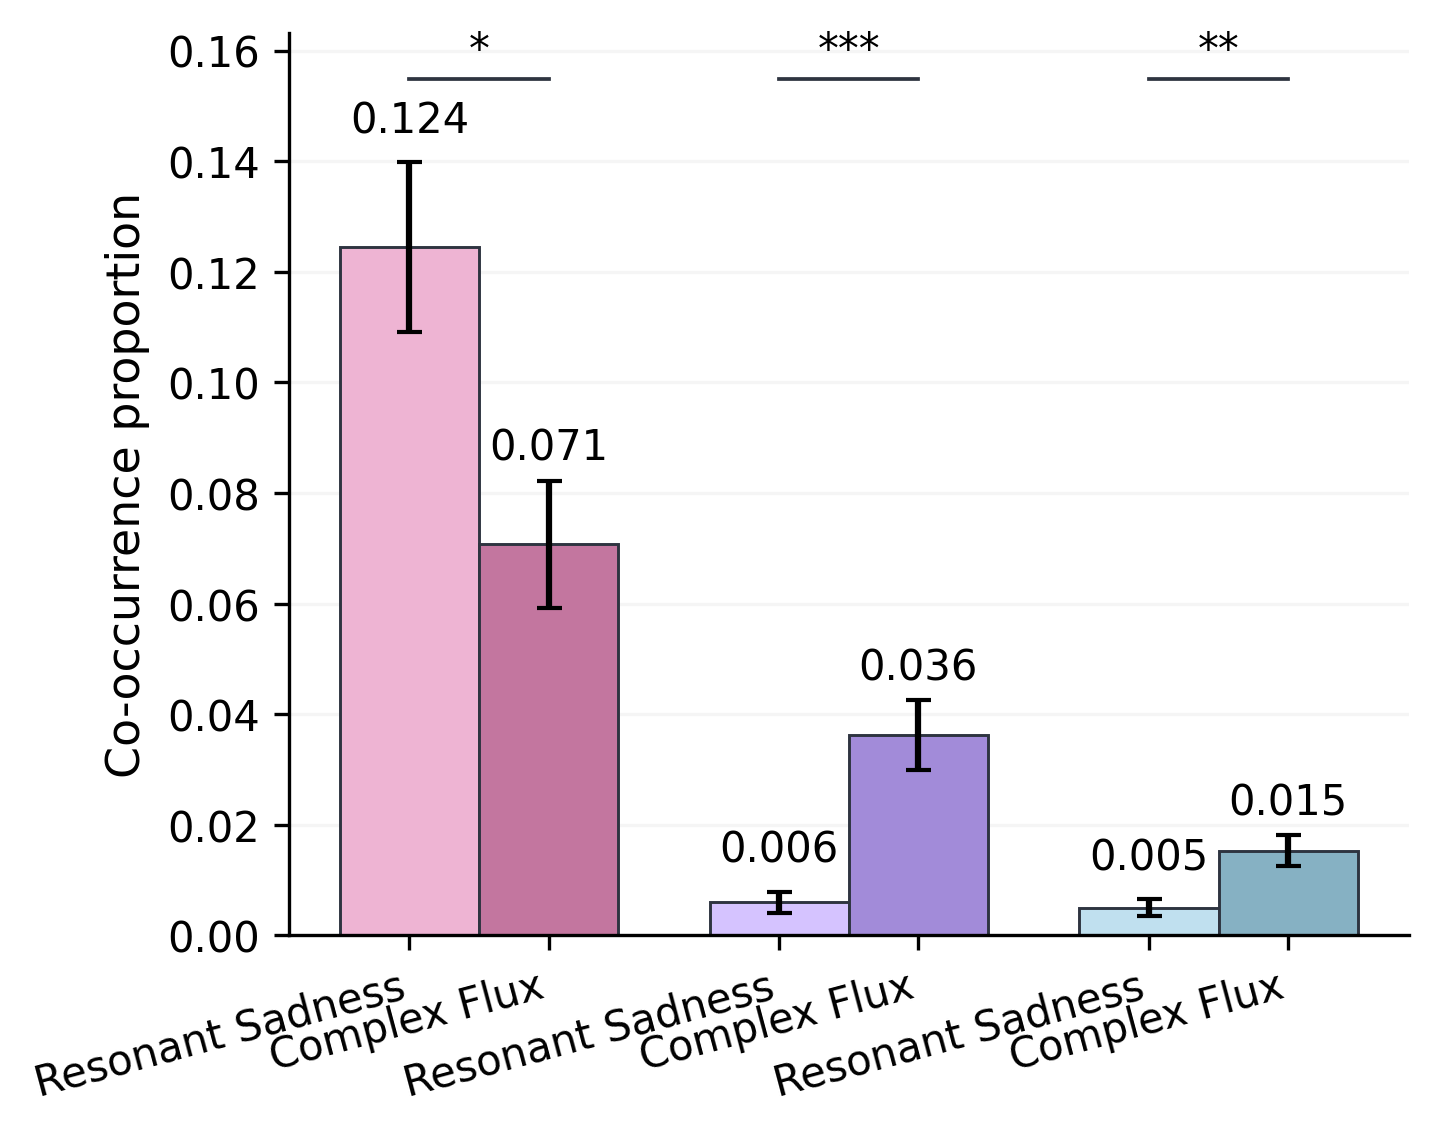

In [45]:
name1=cluster_name[1]
name2=cluster_name[0]
action_movie = df[df[name1]==1].iloc[:,0].tolist()
print(len(action_movie), action_movie)
print([(movie_names_eng[i] in action_movie) for i in range(len(movie_names_eng))])
action=np.array([movie_names_eng[i] in action_movie for i in range(len(movie_names_eng))])
keys_action=[keys[i] for i in range(102) if action[i]==1]

Poetic_movie = df[df[name2]==1].iloc[:,0].tolist()
print(len(Poetic_movie), Poetic_movie)
print([(movie_names_eng[i] in Poetic_movie) for i in range(len(movie_names_eng))])
poetic=np.array([movie_names_eng[i] in Poetic_movie for i in range(len(movie_names_eng))])
keys_poetic=[keys[i] for i in range(102) if poetic[i]==1]
# Co-occurrence in different types of movies
i = 0
j = 2
thr = 3.5
coocc_action = np.zeros(len(keys_action))
for m in range(len(keys_action)):
    scores_now = scores_dict[keys_action[m]]
    coocc_action[m] = pair_coocc_prop(scores_now, i, j, thr, segments=None)
print(np.mean(coocc_action), np.std(coocc_action))

coocc_romance = np.zeros(len(keys_poetic))
for m in range(len(keys_poetic)):
    scores_now = scores_dict[keys_poetic[m]]
    coocc_romance[m] = pair_coocc_prop(scores_now, i, j, thr, segments=None)
print(np.mean(coocc_romance), np.std(coocc_romance))

print(stats.ttest_ind(coocc_action, coocc_romance))

i = 1
j = 5
thr = 3.5
coocc_action = np.zeros(len(keys_action))
for m in range(len(keys_action)):
    scores_now = scores_dict[keys_action[m]]
    coocc_action[m] = pair_coocc_prop(scores_now, i, j, thr, segments=None)
print(np.mean(coocc_action), np.std(coocc_action))

coocc_romance = np.zeros(len(keys_poetic))
for m in range(len(keys_poetic)):
    scores_now = scores_dict[keys_poetic[m]]
    coocc_romance[m] = pair_coocc_prop(scores_now, i, j, thr, segments=None)
print(np.mean(coocc_romance), np.std(coocc_romance))

print(stats.ttest_ind(coocc_action, coocc_romance))

i = 1
j = 4
thr = 3.5
coocc_action = np.zeros(len(keys_action))
for m in range(len(keys_action)):
    scores_now = scores_dict[keys_action[m]]
    coocc_action[m] = pair_coocc_prop(scores_now, i, j, thr, segments=None)
print(np.mean(coocc_action), np.std(coocc_action))

coocc_romance = np.zeros(len(keys_poetic))
for m in range(len(keys_poetic)):
    scores_now = scores_dict[keys_poetic[m]]
    coocc_romance[m] = pair_coocc_prop(scores_now, i, j, thr, segments=None)
print(np.mean(coocc_romance), np.std(coocc_romance))

print(stats.ttest_ind(coocc_action, coocc_romance))
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
from scipy import stats

# 依赖：scores_dict, keys_romance, keys_action, pair_coocc_prop 已在环境中
PAIR_COLORS = {
    "HS": "#E58BBB",   # Happiness + Sadness
    "SF": "#BFA3FF",   # Surprise + Fear
    "SA": "#9ED0E6"   # Surprise + Anger（新增）
}
SPINE_COLOR = "#D1D5DB"
EDGE_COLOR  = "#2E3440"

def lighten(hex_color, t=0.35):
    r,g,b = to_rgb(hex_color)
    return (r + (1-r)*t, g + (1-g)*t, b + (1-b)*t)
def darken(hex_color, t=0.15):
    r,g,b = to_rgb(hex_color)
    return (r*(1-t), g*(1-t), b*(1-t))

def _samples(i, j, thr=3.5):
    rom = np.array([pair_coocc_prop(scores_dict[k], i, j, thr, segments=None) for k in keys_poetic])
    act = np.array([pair_coocc_prop(scores_dict[k], i, j, thr, segments=None) for k in keys_action])
    return rom, act

def _p_to_stars(p):
    return "***" if p < 1e-3 else "**" if p < 1e-2 else "*" if p < 5e-2 else "n.s."
#["Happiness", "Surprise", "Sadness", "Anger", "Disgust", "Fear"]
def plot_grouped_with_sig(thr=3.5, figsize=(6.0, 3.0), dpi=300, savepath=None):
    groups = [("HS", 0, 2), ("SF", 1, 5), ("SA", 1, 4)]
    pair_text = {"HS":"HA + SA", "SF":"SU + FE", "SA":"SU + DI"}

    means_rom, ses_rom, means_act, ses_act, pvals = [], [], [], [], []
    rom_list, act_list = [], []
    for tag, i, j in groups:
        rom, act = _samples(i, j, thr)
        rom_list.append(rom); act_list.append(act)
        means_rom.append(rom.mean()); ses_rom.append(rom.std(ddof=0)/np.sqrt(len(rom)))
        means_act.append(act.mean()); ses_act.append(act.std(ddof=0)/np.sqrt(len(act)))
        pvals.append(stats.ttest_ind(rom, act, equal_var=False).pvalue)  # Welch t-test
    print(pvals)
    G = len(groups)
    group_centers = np.arange(G) * 0.85
    w = 0.32
    offset = 0.32
    x_rom = group_centers - offset/2
    x_act = group_centers + offset/2

    rom_colors = [lighten(PAIR_COLORS[tag]) for tag,_,_ in groups]
    act_colors = [darken(PAIR_COLORS[tag])  for tag,_,_ in groups]

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

    bars_rom = ax.bar(x_rom, means_rom, yerr=ses_rom, width=w,
                      color=rom_colors, edgecolor=EDGE_COLOR, linewidth=0.7,
                      capsize=3)
    bars_act = ax.bar(x_act, means_act, yerr=ses_act, width=w,
                      color=act_colors, edgecolor=EDGE_COLOR, linewidth=0.7,
                      capsize=3)

    def annotate_at_errtop(xs, means, ses):
        pad = max(0.002, 0.03 * max(means + ses))
        for x, m, se in zip(xs, means, ses):
            top = m + (se if np.isfinite(se) else 0.0)
            ax.text(x, top + pad, f"{m:.3f}", ha="center", va="bottom", fontsize=10)
    annotate_at_errtop(x_rom, means_rom, ses_rom)
    annotate_at_errtop(x_act, means_act, ses_act)

    # for xc, (tag, _, _) in zip(group_centers, groups):
    #     idx = [g[0] for g in groups].index(tag)
    #     top_high = max(means_rom[idx] + ses_rom[idx], means_act[idx] + ses_act[idx])
    #     ax.text(xc, 0.125, pair_text[tag],
    #             ha="center", va="bottom", fontsize=9, fontweight="bold")

    def add_sig_bracket(x1, x2, y, text, h, text_pad):
        ax.plot([x1, x2], [y, y], lw=0.9, color=EDGE_COLOR)
        ax.text((x1+x2)/2, y+h, text, ha="center", va="bottom", fontsize=10)

    T = max(
        [m+s for m,s in zip(means_rom, ses_rom)] +
        [m+s for m,s in zip(means_act, ses_act)]
    ) if groups else 0.2
    h = max(0.001, 0.01*T)       
    tpad = 0.0005
    y_base = max(means_rom[0] + ses_rom[0], means_act[0] + ses_act[0])
    for g_idx in range(G):
#        y_base = max(means_rom[g_idx] + ses_rom[g_idx], means_act[g_idx] + ses_act[g_idx])
        add_sig_bracket(x_rom[g_idx], x_act[g_idx], y_base + 0.015, _p_to_stars(pvals[g_idx]), h, tpad)

    xticks = np.ravel(np.column_stack([x_rom, x_act])).tolist()
    ax.set_xticks(xticks)
    ax.set_xticklabels(([name2, name1] * G), fontsize=10, rotation=15, ha="right")

    ax.set_ylabel("Co-occurrence proportion", fontsize=11)
    ax.yaxis.grid(True, linestyle="-", alpha=0.12)
    ax.set_axisbelow(True)
    for side in ["top", "right"]:
        ax.spines[side].set_visible(False)
    # ax.spines["left"].set_color(SPINE_COLOR)
    # ax.spines["bottom"].set_color(SPINE_COLOR)
    ax.tick_params(axis='y', labelsize=10)

    ymax_components = []
    for g_idx in range(G):
        top = max(means_rom[g_idx]+ses_rom[g_idx], means_act[g_idx]+ses_act[g_idx])
        ymax_components.append(top + 0.01*T + h + tpad + 0.01)  # 括号+星号+留白
    ax.set_ylim(0, max(ymax_components)+0.01)

    plt.tight_layout()
    if savepath:
        plt.savefig(savepath, bbox_inches="tight")
    return fig, ax

fig, ax = plot_grouped_with_sig(thr=3.5, figsize=(5, 4), dpi=300,
                                savepath="figures/coocc_romance_vs_action_groups_sig.svg")
plt.show()
